<a href="https://colab.research.google.com/github/gyanigk/ML-HW4/blob/main/language_features-model_bulding_prefinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re

#Loading the dataset and parsing the required information from the dataset.

In [35]:
# Reading in data
prosodic_file = "https://raw.githubusercontent.com/gyanigk/ML-HW4/refs/heads/main/data/prosodic_features.csv"
scores_file = "https://raw.githubusercontent.com/gyanigk/ML-HW4/refs/heads/main/data/scores.csv"
transcript_file = "https://raw.githubusercontent.com/gyanigk/ML-HW4/refs/heads/main/data/transcripts.csv"

# Read csvs into a file
prosodic_data = pd.read_csv(prosodic_file)
scores_data = pd.read_csv(scores_file)
transcript_data = pd.read_csv(transcript_file)

# Add a column that corresponds to participant for easy splitting for prosodic data
prosodic_data['Participant'] = prosodic_data['participant&question'].str.extract(r'^(PP?\d+)')
prosodic_data['Participant'] = prosodic_data['Participant'].str.lower()
# Make the entire transcript lower case
transcript_data['transcript'] = transcript_data['transcript'].str.lower()
transcript_data.rename(columns={'pid': 'Participant'}, inplace=True)

In [36]:
prosodic_data.head()

,participant&question,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Participant
0,P1Q1,51.952125,0.015331,75.232657,396.635613,127.989222,27.821528,217.628692,119.690367,0.773830,...,0.42117,0.000342,55,1.290667,0.494,27.176,138,274.562,257.247,p1
1,P1Q2,38.677312,0.015185,75.165527,397.613041,131.067490,26.452853,195.852246,124.820583,0.717333,...,0.38674,0.000444,40,1.866667,0.522,20.875,100,268.613,270.193,p1
2,P1Q3,43.593896,0.014680,71.034761,395.930688,127.739086,26.006330,189.441737,120.457848,1.068376,...,0.43099,0.000475,44,2.624000,0.505,22.229,114,283.912,203.506,p1
3,P1Q4,23.435813,0.008920,74.938673,248.733738,129.563914,19.334327,103.024640,124.473851,1.121487,...,0.46003,0.000907,24,2.933333,0.507,12.171,55,100.655,83.172,p1
4,P1Q5,13.274833,0.003432,93.949854,263.669188,130.178482,26.595483,174.934601,120.272480,1.078493,...,0.46576,0.001570,12,2.848000,0.628,7.541,32,129.591,117.119,p1


In [37]:
prosodic_data = prosodic_data[prosodic_data['avgBand3'] != '--undefined--']

In [38]:
prosodic_data['avgBand3'] = prosodic_data['avgBand3'].astype(float)

In [39]:
# Group by 'Participant' and calculate the mean for numeric columns
prosodic_grouped = prosodic_data.groupby('Participant').mean(numeric_only=True).reset_index()


In [40]:
prosodic_grouped.head()

,Participant,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3
0,p1,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,0.951904,...,86.40,0.432938,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474
1,p10,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,0.825242,...,149.40,0.411714,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450
2,p11,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,0.628611,...,120.80,0.367116,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714
3,p12,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,0.804380,...,92.20,0.397498,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378
4,p13,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,1.132642,...,96.25,0.490740,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950


In [41]:
prosodic_grouped.shape

(138, 36)

In [42]:
scores_data.head()

,Participant,Overall,Excited
0,p1,5.297316,5.043890
1,p3,4.414892,5.601586
2,p4,4.494494,4.261343
3,p5,5.457670,4.707062
4,p6,5.106512,4.648259


In [43]:
transcript_data.head()

,Participant,transcript,Question,Answer
0,p1,interviewer: so how are you doing?|interviewee...,NaN,NaN
1,p10,interviewer: so how you doing?|interviewee: g...,NaN,NaN
2,p11,interviewer: so tell me about yourself. |inte...,NaN,NaN
3,p12,interviewer: so how are you doing today?|inter...,NaN,NaN
4,p13,interviewer: how are you doing today?|intervie...,NaN,NaN


In [44]:
transcript_data.shape

(138, 4)

In [45]:
scores_data.head()

,Participant,Overall,Excited
0,p1,5.297316,5.043890
1,p3,4.414892,5.601586
2,p4,4.494494,4.261343
3,p5,5.457670,4.707062
4,p6,5.106512,4.648259


In [46]:
transcript_data.drop(columns=['Question','Answer'],inplace=True)

In [47]:
transcript_prosodic = pd.merge(transcript_data, prosodic_grouped, on='Participant')
transcript_prosodic.head()

,Participant,transcript,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3
0,p1,interviewer: so how are you doing?|interviewee...,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,...,86.40,0.432938,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474
1,p10,interviewer: so how you doing?|interviewee: g...,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,...,149.40,0.411714,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450
2,p11,interviewer: so tell me about yourself. |inte...,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,...,120.80,0.367116,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714
3,p12,interviewer: so how are you doing today?|inter...,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,...,92.20,0.397498,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378
4,p13,interviewer: how are you doing today?|intervie...,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,...,96.25,0.490740,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950


In [48]:
transcript_prosodic = pd.merge(transcript_prosodic, scores_data, on='Participant')

In [49]:
transcript_prosodic.head()

,Participant,transcript,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Overall,Excited
0,p1,interviewer: so how are you doing?|interviewee...,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,...,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474,5.297316,5.043890
1,p10,interviewer: so how you doing?|interviewee: g...,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,...,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450,4.725115,4.383947
2,p11,interviewer: so tell me about yourself. |inte...,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,...,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714,5.010430,4.297760
3,p12,interviewer: so how are you doing today?|inter...,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,...,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378,5.038526,5.322526
4,p13,interviewer: how are you doing today?|intervie...,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,...,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950,4.251251,3.579510


In [50]:
transcript_prosodic.shape

(138, 39)

In [51]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Preprocessing function for transcripts
def preprocess_text(text):
    if text is None:  # Check if the text is None
        return ""  # Return an empty string if text is None
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[,]', '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'interviewer', ' ', text)
    text = re.sub(r'interviewee', ' ', text)
    # Tokenization
    words = text.split()
    # Removing Stop Words
    # stop_words = set(stopwords.words('english'))


    # words = [word for word in words if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    # words = [stemmer.stem(word) for word in words]
    return ' '.join(words)  # Return the processed text as a single string

In [52]:
!pip install vaderSentiment
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import torch
from transformers import BertTokenizer, BertModel

nltk.download('punkt')  # Tokenizer
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')  # POS Tagger
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon') # Vader
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
transcript_prosodic['transcript'] = transcript_prosodic['transcript'].apply(preprocess_text)

In [54]:
transcript_prosodic.head()

,Participant,transcript,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Overall,Excited
0,p1,so how are you doing im pretty good ok well so...,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,...,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474,5.297316,5.043890
1,p10,so how you doing great how about you i m okay ...,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,...,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450,4.725115,4.383947
2,p11,so tell me about yourself uhh i m a junior at ...,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,...,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714,5.010430,4.297760
3,p12,so how are you doing today i m good how are yo...,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,...,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378,5.038526,5.322526
4,p13,how are you doing today good good so why don t...,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,...,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950,4.251251,3.579510


In [55]:
def create_folds(data, test_ratio=0.2, num_folds=5):
    """
    Split participants into a dedicated test set and create cross-validation folds for train/validation.

    Parameters:
        data (DataFrame): The dataset containing a 'Participant' column.
        test_ratio (float): The proportion of participants to set aside for the test set.
        num_folds (int): The number of folds for cross-validation.

    Returns:
        tuple:
            test_set_participants (list): Participants allocated to the test set.
            interview_folds (list): List of interview folds for cross-validation.
    """
    # Grab unique participant numbers from the data
    interviews = data['Participant'].unique()
    participants = list(set([re.sub(r'^pp?|q\d+', '', item) for item in interviews]))
    random.shuffle(participants, random.seed(42))

    # Split participants into test and train/validation groups
    test_participants = participants[:int(len(participants) * test_ratio)]
    train_val_participants = participants[int(len(participants) * test_ratio):]

    # Create cross-validation folds from train/validation participants
    participant_folds = [train_val_participants[i::num_folds] for i in range(num_folds)]

    test_set_participants = [item for num in test_participants for item in (f"p{num}", f"pp{num}")]

    # Map folds to interview IDs
    interview_folds = []
    for fold in participant_folds:
        interview_folds.append([item for num in fold for item in (f"p{num}", f"pp{num}")])

    return test_set_participants, interview_folds


In [56]:
test_set_participants, interview_folds = create_folds(transcript_prosodic, test_ratio=0.1, num_folds=5)

In [57]:
def get_data_splits(data, fold_number, test_participants, interview_folds):
    """
    Split data into training, validation, and testing sets based on a specified fold.

    Parameters:
        data (DataFrame): The complete dataset.
        fold_number (int): The fold to use for validation (0-based index).
        test_participants (list): Participants allocated to the test set.
        interview_folds (list): Cross-validation folds for training and validation.

    Returns:
        tuple: (training_set, validation_set, testing_set)
    """
    # Ensure valid fold number
    assert 0 <= fold_number < len(interview_folds), "Fold_number must be between 0 and len(folds) - 1"

    # Create the test set using the test participants
    test_set = data[data['Participant'].isin(test_participants)]

    # Create the validation set from the current fold
    val_set = data[data['Participant'].isin(interview_folds[fold_number])]

    # Create the training set from all folds except the current one
    train_set_parts = [
        item
        for i, fold in enumerate(interview_folds)
        if i != fold_number
        for item in fold
    ]
    train_set = data[data['Participant'].isin(train_set_parts)]

    return train_set, val_set, test_set


In [58]:
train_set, val_set, test_set = get_data_splits(transcript_prosodic, 2, test_set_participants, interview_folds)
print("Transcript Prosodic Data: ")
print(train_set.shape, " ", val_set.shape, " ", test_set.shape)
# train_set, val_set, test_set = get_data_splits(scores_data, 0)
# print("Scores Data: ")
# print(train_set.shape, " ", val_set.shape, " ", test_set.shape)
# # print(test_set.head())
# train_set, val_set, test_set = get_data_splits(transcript_data, 0)
# print("Transcript Data: ")
# print(train_set.shape, " ", val_set.shape, " ", test_set.shape)

Transcript Prosodic Data: 
(100, 39)   (26, 39)   (12, 39)


In [59]:
test_set.head()

,Participant,transcript,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Overall,Excited
6,p15,okay so how are you doing today i m doing fine...,85.914300,0.011884,69.314721,403.366434,170.827460,42.596687,230.651946,169.319364,...,0.000240,75.8,2.581333,0.5950,44.5280,215.6,252.0406,253.3656,4.625319,4.538093
20,p33,so how are you doing today i m uh pretty good ...,56.923129,0.021261,72.935088,389.991992,179.348832,46.312956,264.942349,165.574430,...,0.000463,46.4,4.408844,1.0108,36.3940,157.4,227.8854,209.9192,5.277816,5.302902
41,p6,so how are you doing i m doing good how are yo...,81.745013,0.003205,73.461743,355.214130,107.848640,23.362177,124.561066,101.222895,...,0.000309,81.8,1.931131,0.5262,43.0432,219.6,251.8146,248.0354,5.106512,4.648259
47,p65,so how are you doing today yeah pretty good um...,111.684042,0.015629,69.176064,385.728382,120.068976,36.836358,222.704435,109.141855,...,0.000205,101.8,2.702933,0.5518,55.0816,284.6,260.0086,252.9828,5.224230,4.530601
50,p69,so tell me about yourself uh so i m uh i guess...,53.551046,0.003017,72.445461,346.025482,118.968686,65.824380,292.678570,92.151197,...,0.000551,46.4,2.519467,0.6862,32.0866,140.2,250.5500,252.4726,3.770640,3.125481


Extracting language features

Syntactic Vectorization with CountVectorizer


In [60]:
# Remove common stop words in english and ignore words that appear fewer than 2 times
vectorizer = CountVectorizer(stop_words='english', min_df=3)
count_matrix = vectorizer.fit_transform(transcript_prosodic['transcript'])

# Convert from sparse X matrix to a denser one for easy use
X_dense = count_matrix.toarray()
feature_names_count = vectorizer.get_feature_names_out()

word_count = pd.DataFrame(X_dense, columns=feature_names_count)
print(word_count.shape)
word_count.head()

(138, 1651)


,abilities,ability,able,abroad,absolutely,academia,academic,academically,academics,accept,...,xx,ya,yea,yeah,year,years,yep,yes,young,younger
0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,3,8,0,0,0,0,0
2,0,0,2,0,0,0,1,0,0,0,...,0,0,0,1,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler

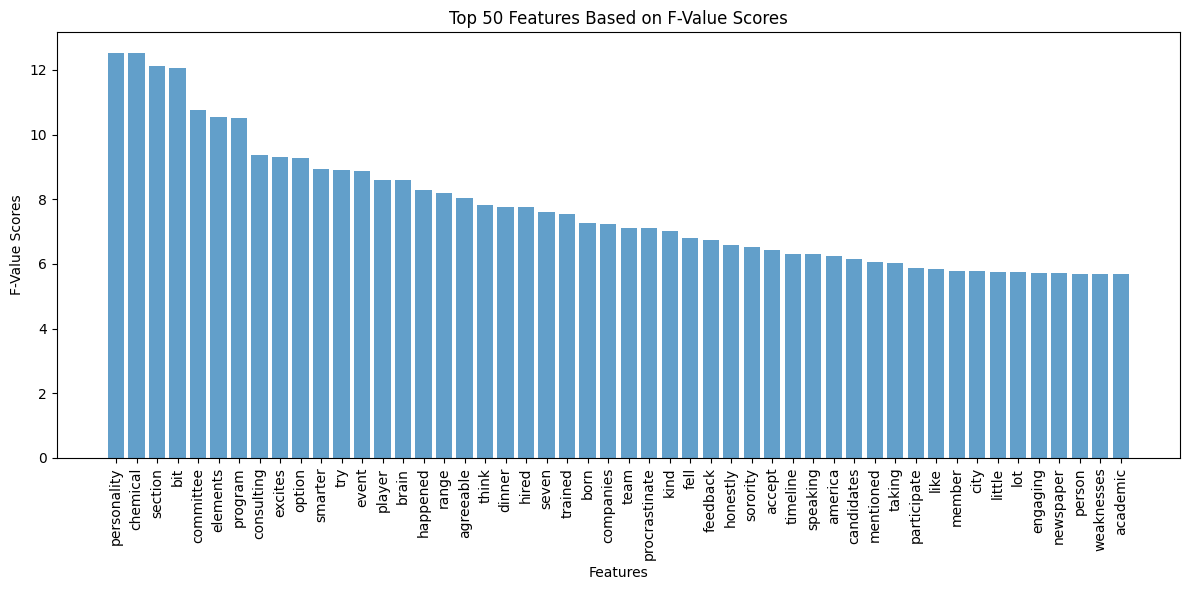

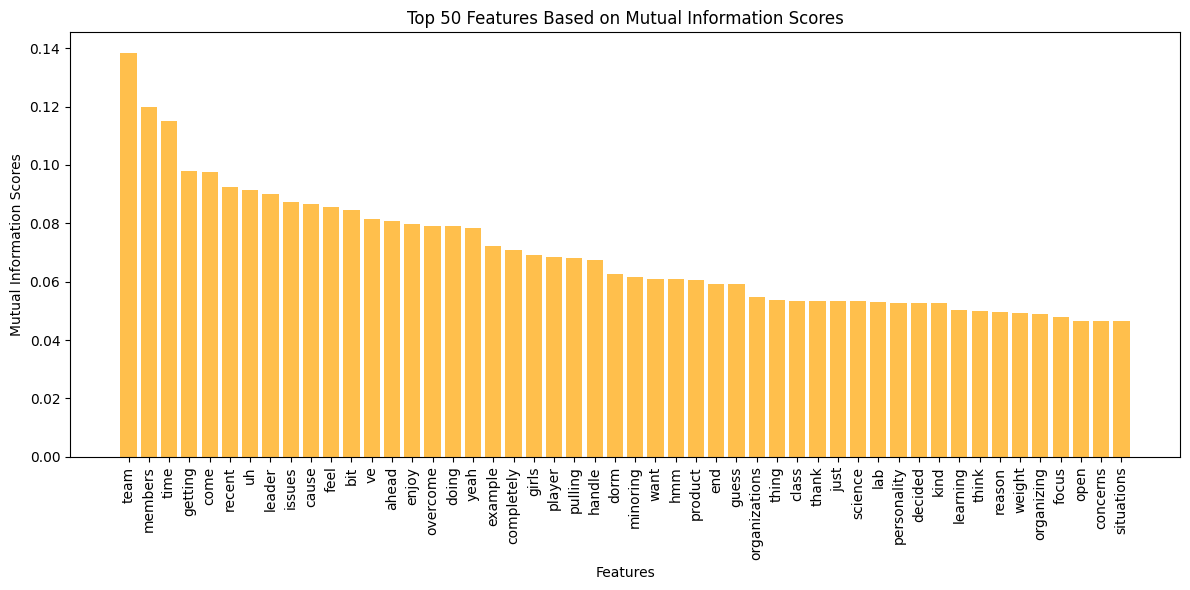

In [62]:
k=50
# Using SelectKBest with F-value
selector_f = SelectKBest(score_func=f_regression, k=k)
X_selected_f = selector_f.fit_transform(word_count, transcript_prosodic['Overall'])

# Get F-value scores and sort them
f_scores = selector_f.scores_
f_support = selector_f.get_support()
selected_f_features = word_count.columns[f_support]
sorted_indices_f = np.argsort(f_scores[f_support])[::-1]  # Sort descending
sorted_features_f = selected_f_features[sorted_indices_f]
sorted_f_scores = f_scores[f_support][sorted_indices_f]

# Using SelectKBest with Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_regression, k=k)
X_selected_mi = selector_mi.fit_transform(word_count, transcript_prosodic['Overall'])

# Get MI scores and sort them
mi_scores = selector_mi.scores_
mi_support = selector_mi.get_support()
selected_mi_features = word_count.columns[mi_support]
sorted_indices_mi = np.argsort(mi_scores[mi_support])[::-1]  # Sort descending
sorted_features_mi = selected_mi_features[sorted_indices_mi]
sorted_mi_scores = mi_scores[mi_support][sorted_indices_mi]

# Plot Top K Features for F-value
plt.figure(figsize=(12, 6))
plt.bar(sorted_features_f, sorted_f_scores, alpha=0.7, label="F-value Scores")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-Value Scores')
plt.title(f'Top {k} Features Based on F-Value Scores')
plt.tight_layout()
plt.show()

# Plot Top K Features for Mutual Information
plt.figure(figsize=(12, 6))
plt.bar(sorted_features_mi, sorted_mi_scores, alpha=0.7, color='orange', label="MI Scores")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Scores')
plt.title(f'Top {k} Features Based on Mutual Information Scores')
plt.tight_layout()
plt.show()

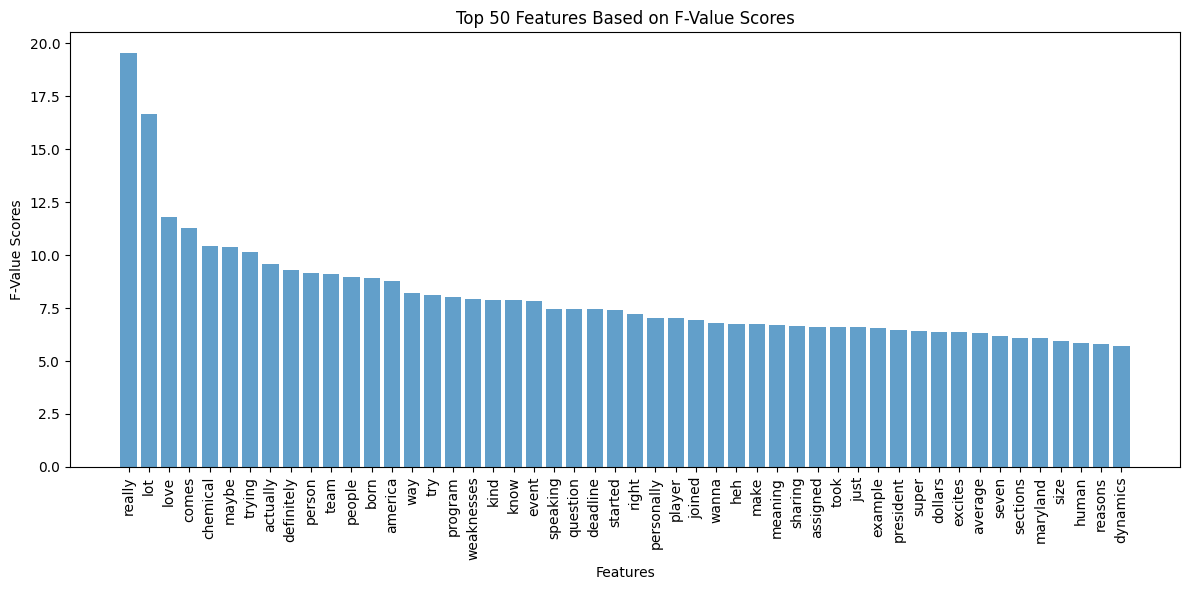

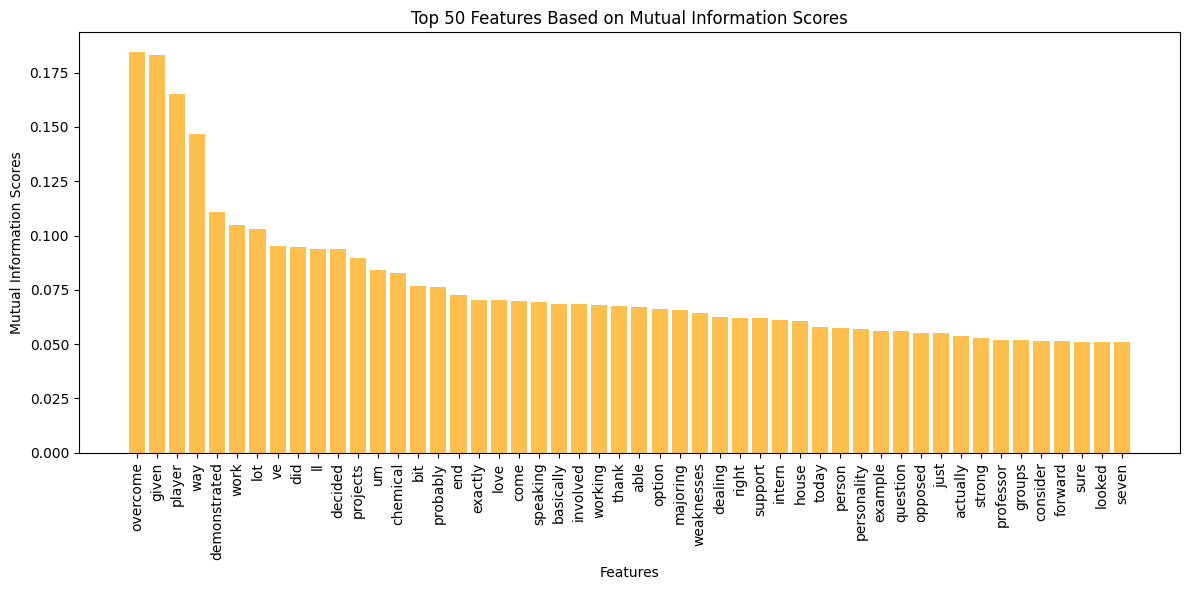

In [63]:
# Using SelectKBest with F-value
selector_f = SelectKBest(score_func=f_regression, k=k)
X_selected_f = selector_f.fit_transform(word_count, transcript_prosodic['Excited'])

# Get F-value scores and sort them
f_scores_excited = selector_f.scores_
f_support_excited = selector_f.get_support()
selected_f_excited_features = word_count.columns[f_support_excited]
sorted_indices_f_excited = np.argsort(f_scores_excited[f_support_excited])[::-1]  # Sort descending
sorted_excited_features_f = selected_f_excited_features[sorted_indices_f_excited]
sorted_f_scores_excited = f_scores_excited[f_support_excited][sorted_indices_f_excited]

# Using SelectKBest with Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_regression, k=k)
X_selected_mi = selector_mi.fit_transform(word_count, transcript_prosodic['Excited'])

# Get MI scores and sort them
mi_scores_excited = selector_mi.scores_
mi_support_excited = selector_mi.get_support()
selected_mi_features = word_count.columns[mi_support_excited]
sorted_indices_mi_excited = np.argsort(mi_scores_excited[mi_support_excited])[::-1]  # Sort descending
sorted_excited_features = selected_mi_features[sorted_indices_mi_excited]
sorted_mi_scores_excited = mi_scores_excited[mi_support_excited][sorted_indices_mi_excited]

# Plot Top K Features for F-value
plt.figure(figsize=(12, 6))
plt.bar(sorted_excited_features_f, sorted_f_scores_excited, alpha=0.7, label="F-value Scores")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-Value Scores')
plt.title(f'Top {k} Features Based on F-Value Scores')
plt.tight_layout()
plt.show()

# Plot Top K Features for Mutual Information
plt.figure(figsize=(12, 6))
plt.bar(sorted_excited_features, sorted_mi_scores_excited, alpha=0.7, color='orange', label="MI Scores")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Scores')
plt.title(f'Top {k} Features Based on Mutual Information Scores')
plt.tight_layout()
plt.show()

In [64]:
word_count_scores = word_count.copy()
word_count_scores['Overall'] = transcript_prosodic['Overall']
word_count_scores['Excited'] = transcript_prosodic['Excited']

Top K Features Correlating with 'Overall':

Top K Feature Names: ['personality', 'chemical', 'section', 'bit', 'committee', 'elements', 'program', 'consulting', 'excites', 'option', 'smarter', 'try', 'event', 'player', 'brain', 'happened', 'range', 'agreeable', 'think', 'dinner', 'hired', 'seven', 'trained', 'born', 'companies', 'team', 'procrastinate', 'kind', 'fell', 'feedback', 'honestly', 'sorority', 'accept', 'timeline', 'speaking', 'america', 'candidates', 'mentioned', 'taking', 'participate', 'like', 'member', 'city', 'little', 'lot', 'engaging', 'newspaper', 'person', 'weaknesses', 'academic']


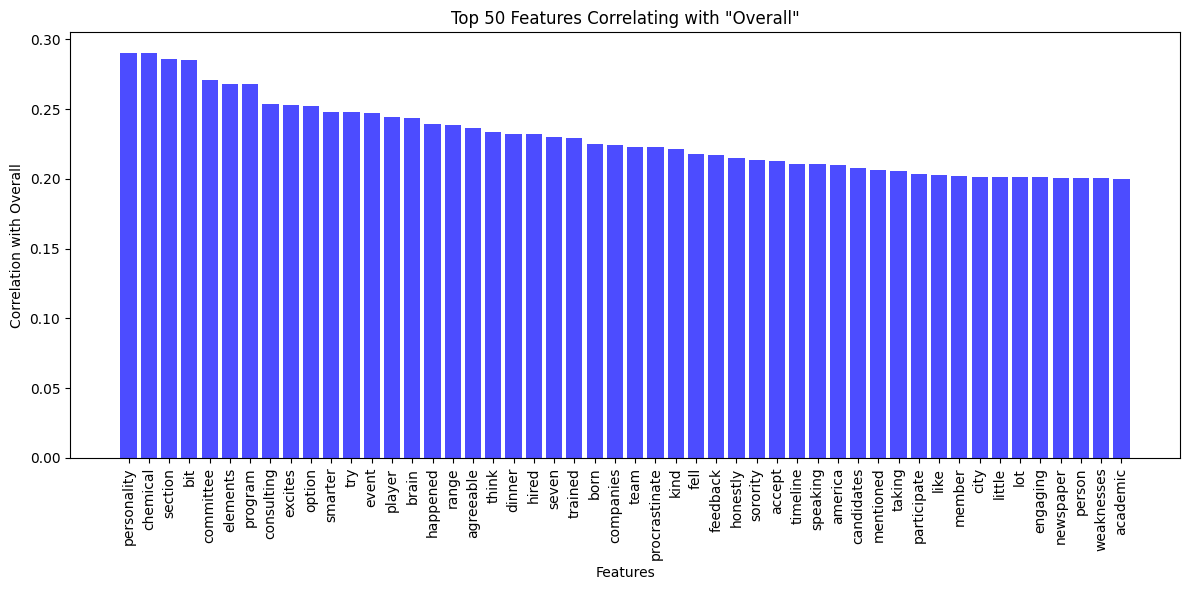

In [65]:
# Compute the correlation matrix
correlation_matrix = word_count_scores.corr()

# Extract correlations with 'Overall'
overall_corr = correlation_matrix['Overall']

# Drop 'Overall' itself from the list (self-correlation is always 1)
overall_corr = overall_corr.drop(['Overall', 'Excited'])

# Sort by absolute correlation value in descending order
sorted_corr = overall_corr.abs().sort_values(ascending=False)

# Get the top k features
k = 50  # Set your desired number of top features
top_k_features = sorted_corr.head(k)

print("Top K Features Correlating with 'Overall':")
# print(top_k_features)

# Optional: Get the corresponding column names
top_k_feature_names = top_k_features.index.tolist()
print("\nTop K Feature Names:", top_k_feature_names)

plt.figure(figsize=(12, 6))
plt.bar(top_k_feature_names, top_k_features, alpha=0.7, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Overall')
plt.title(f'Top {k} Features Correlating with "Overall"')
plt.tight_layout()
plt.show()

Bottom K Features Correlating with 'Overall':

Top K Feature Names: ['leave', 'curriculum', 'idea', 'component', 'math', 'talk', 'grasp', 'university', 'white', 'decide', 'require', 'free', 'plan', 'hit', 'groups', 'navigate', 'quantitative', 'awesome', 'positive', 'recognizing', 'teams', 'reading', 'ummm', 'testing', 'nasa', 'charge', 'somewhat', 'code', 'timely', 'site', 'land', 'water', 'astronautical', 'aeronautical', 'excellent', 'peer', 'mind', 'cause', 'private', 'maintaining', 'lines', 'communication', 'helped', 'running', 'togo', 'matter', 'decisions', 'public', 'patients', 'nationals']


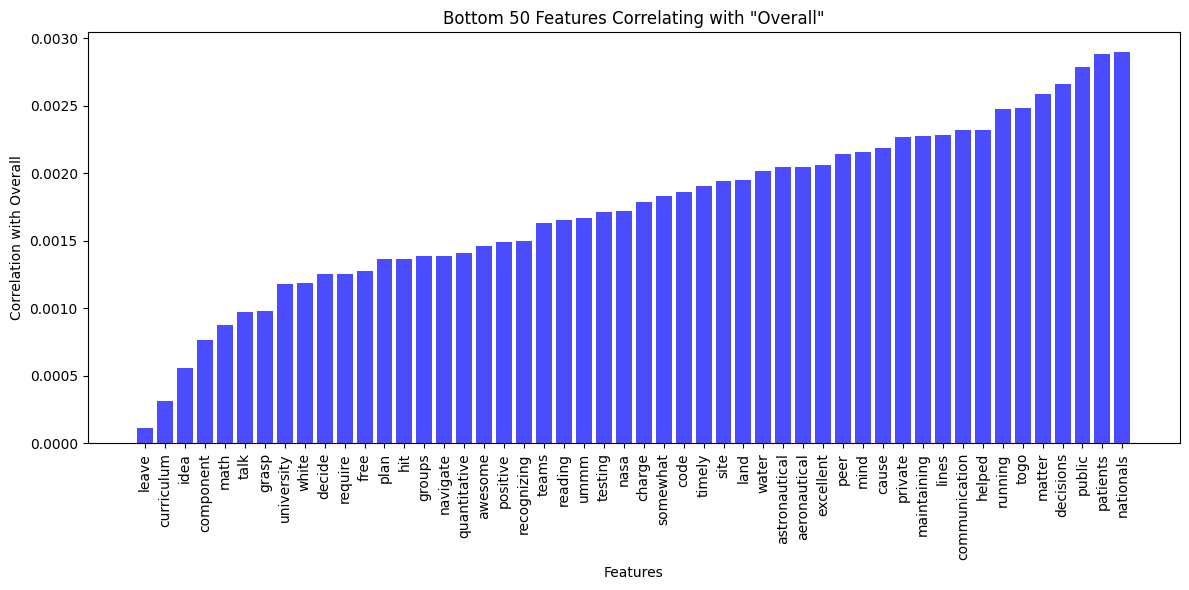

In [66]:
# Sort by absolute correlation value in descending order
sorted_corr = overall_corr.abs().sort_values(ascending=True)

# Get the top k features
k = 50  # Set your desired number of top features
bottom_k_features = sorted_corr.head(k)

print("Bottom K Features Correlating with 'Overall':")
# print(bottom_k_features)

# Optional: Get the corresponding column names
bottom_k_feature_names = bottom_k_features.index.tolist()
print("\nTop K Feature Names:", bottom_k_feature_names)

plt.figure(figsize=(12, 6))
plt.bar(bottom_k_feature_names, bottom_k_features, alpha=0.7, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Overall')
plt.title(f'Bottom {k} Features Correlating with "Overall"')
plt.tight_layout()
plt.show()

Top K Features Correlating with 'Excited':

Top K Feature Names: ['really', 'lot', 'love', 'comes', 'chemical', 'maybe', 'trying', 'actually', 'definitely', 'person', 'team', 'people', 'born', 'america', 'way', 'try', 'program', 'weaknesses', 'kind', 'know', 'event', 'speaking', 'question', 'deadline', 'started', 'right', 'personally', 'player', 'joined', 'wanna', 'heh', 'make', 'meaning', 'sharing', 'assigned', 'took', 'just', 'example', 'president', 'super', 'dollars', 'excites', 'average', 'seven', 'sections', 'maryland', 'size', 'human', 'reasons', 'dynamics']


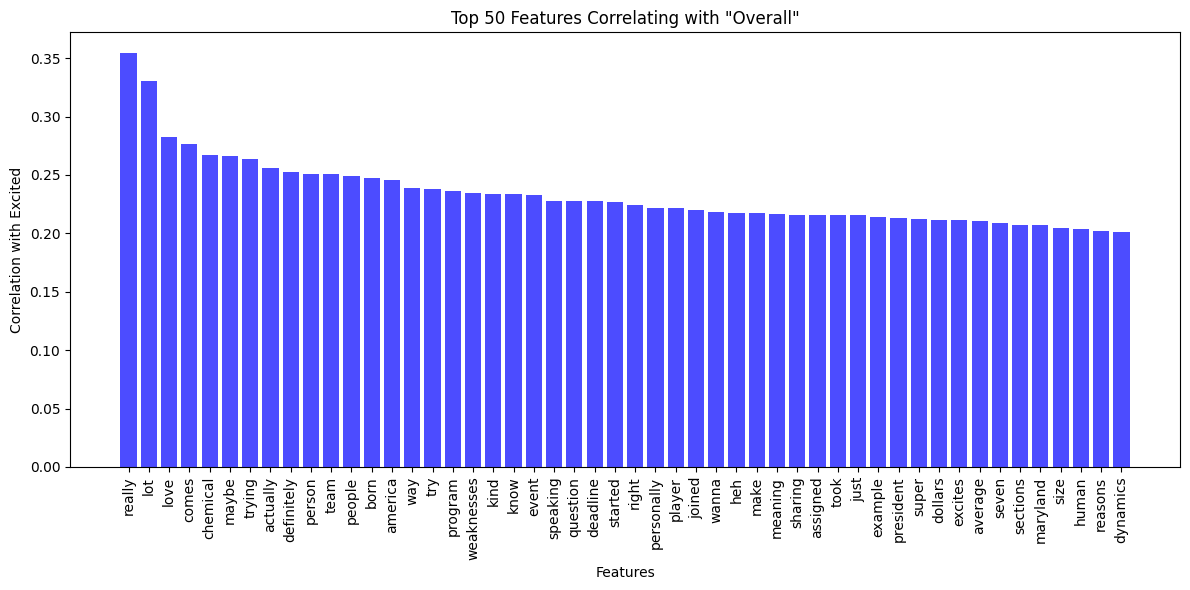

In [67]:
# Extract correlations with 'Overall'
excited_corr = correlation_matrix['Excited']

# Drop 'Overall' itself from the list (self-correlation is always 1)
excited_corr = excited_corr.drop('Overall').drop('Excited')

# Sort by absolute correlation value in descending order
sorted_corr = excited_corr.abs().sort_values(ascending=False)

# Get the top k features
k = 50  # Set your desired number of top features
top_k_excited_features = sorted_corr.head(k)

print("Top K Features Correlating with 'Excited':")
# print(top_k_excited_features)

# Optional: Get the corresponding column names
top_k_feature_excited_names = top_k_excited_features.index.tolist()
print("\nTop K Feature Names:", top_k_feature_excited_names)


plt.figure(figsize=(12, 6))
plt.bar(top_k_feature_excited_names, top_k_excited_features, alpha=0.7, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Excited')
plt.title(f'Top {k} Features Correlating with "Overall"')
plt.tight_layout()
plt.show()

Bottom K Features Correlating with 'Excited':

Bottom K Feature Names: ['minute', 'projects', 'week', 'outreach', 'practical', 'project', 'split', 'local', 'population', 'motivating', 'mass', 'accomplish', 'write', 'okay', 'products', 'told', 'component', 'water', 'aside', 'constraints', 'experiment', 'kids', 'groups', 'arise', 'teacher', 'sending', 'believe', 'outcome', 'extremely', 'mentor', 'older', 'feeling', 'experienced', 'opinions', 'wish', 'near', 'timely', 'organization', 'teammates', 'controlling', 'held', 'younger', 'gotta', 'simply', 'probably', 'facilitate', 'history', 'medical', 'visions', 'running']


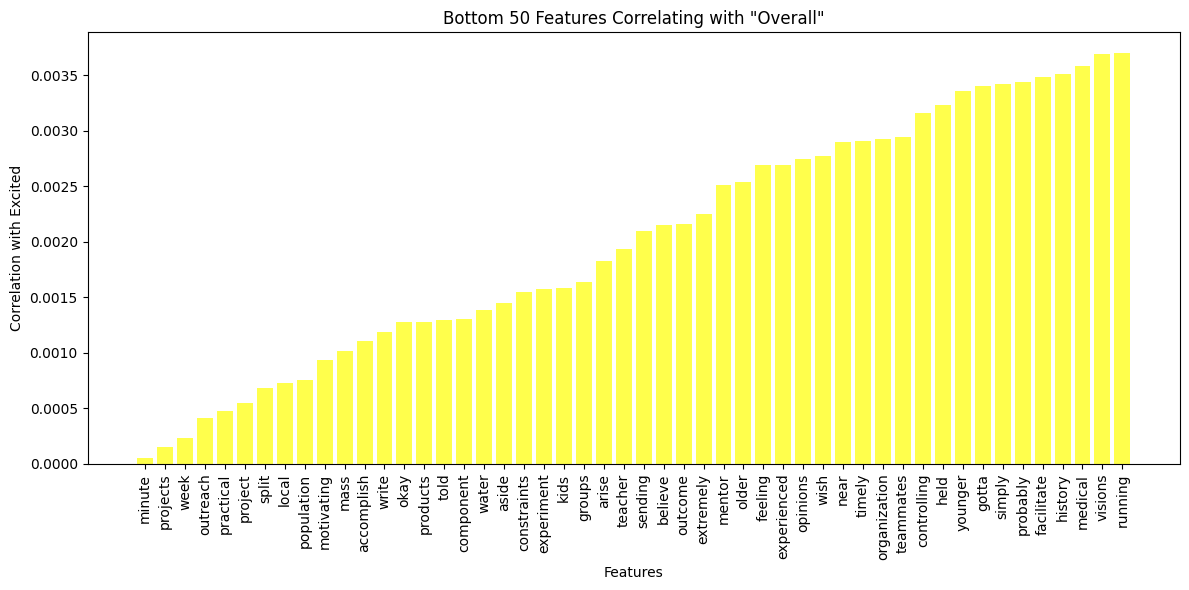

In [68]:
# Sort by absolute correlation value in descending order
sorted_corr = excited_corr.abs().sort_values(ascending=True)

# Get the bottom k features
k = 50
bottom_k_excited_features = sorted_corr.head(k)

print("Bottom K Features Correlating with 'Excited':")
# print(bottom_k_excited_features)

# Optional: Get the corresponding column names
bottom_k_feature_excited_names = bottom_k_excited_features.index.tolist()
print("\nBottom K Feature Names:", bottom_k_feature_excited_names)


plt.figure(figsize=(12, 6))
plt.bar(bottom_k_feature_excited_names, bottom_k_excited_features, alpha=0.7, color='yellow')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Excited')
plt.title(f'Bottom {k} Features Correlating with "Overall"')
plt.tight_layout()
plt.show()

Syntactic Vectorization with TFIDF Vectorizer


In [69]:
# Syntactic vectorizer: TFIDF Vectorizer
tfidf = TfidfVectorizer(min_df=3)
tfidf_matrix = tfidf.fit_transform(transcript_prosodic['transcript'])
feature_names_tf = tfidf.get_feature_names_out()
tfidf_count = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names_tf)
print(tfidf_count.shape)
tfidf_count.head()

(138, 1887)


,abilities,ability,able,about,above,abroad,absolutely,academia,academic,academically,...,year,years,yep,yes,yet,you,young,younger,your,yourself
0,0.0,0.0,0.035401,0.046715,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.016001,0.0,0.0,0.025937,0.038486,0.128465,0.0,0.0,0.023357,0.011763
1,0.0,0.0,0.010343,0.054595,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.074802,0.0,0.0,0.000000,0.000000,0.102366,0.0,0.0,0.006824,0.006874
2,0.0,0.0,0.030797,0.050799,0.0,0.0,0.0,0.0,0.032124,0.0,...,0.027840,0.0,0.0,0.000000,0.000000,0.091438,0.0,0.0,0.010160,0.010233
3,0.0,0.0,0.000000,0.054447,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.261344,0.0,0.0,0.021779,0.010968
4,0.0,0.0,0.018213,0.048067,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.144202,0.0,0.0,0.012017,0.012104


Statistical Features (word count and average word length)


In [70]:
# Statistical Features (word count and average word length)
semantic_features = pd.DataFrame()
# Word Count for the entire interview
semantic_features['Participant'] = transcript_prosodic['Participant']
semantic_features['word_count'] = transcript_prosodic['transcript'].apply(lambda x: len(x.split()))

# Average word length for the interview
semantic_features['avg_word_length'] = transcript_prosodic['transcript'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

semantic_features.head()

,Participant,word_count,avg_word_length
0,p1,614,4.000000
1,p10,1148,3.889373
2,p11,758,4.196570
3,p12,737,3.648575
4,p13,667,4.058471


Part of speech tagging

In [71]:
from collections import Counter

# Part of speech tagging
semantic_features['pos tagging'] = transcript_prosodic['transcript'].apply(lambda x: pos_tag(word_tokenize(x)))
semantic_features['pos tagging'].head()
# NN: Noun singular
# VB: Verb base form
# JJ: Adjective
# RB: Adverb
# DT: Determiner
# IN: Preposition or subordination conjunction
# Count POS tags

def pos_tag_counter(pos_tags):
    tags = [tag for _, tag in pos_tags]  # Extract tags only
    return Counter(tags)

# Apply to generate a Counter for each transcript
semantic_features['pos_tag_counts'] = semantic_features['pos tagging'].apply(pos_tag_counter)


# Get a list of all unique POS tags in the dataset
all_pos_tags = set(tag for tags in semantic_features['pos_tag_counts'] for tag in tags.keys())

# Convert counts to a feature matrix
pos_tag_matrix = pd.DataFrame(list(semantic_features['pos_tag_counts'].apply(lambda x: {tag: x.get(tag, 0) for tag in all_pos_tags})))

# Combine with the original features
semantic_features = pd.concat([semantic_features, pos_tag_matrix], axis=1)


In [72]:
semantic_features.head()

,Participant,word_count,avg_word_length,pos tagging,pos_tag_counts,WRB,IN,PRP$,CC,VBD,...,VBZ,TO,FW,VB,VBP,RB,VBN,VBG,NNS,WP
0,p1,614,4.000000,"[(so, IN), (how, WRB), (are, VBP), (you, PRP),...","{'IN': 62, 'WRB': 9, 'VBP': 35, 'PRP': 38, 'VB...",9,62,7,30,21,...,13,17,0,36,35,48,8,10,29,1
1,p10,1148,3.889373,"[(so, RB), (how, WRB), (you, PRP), (doing, VBG...","{'RB': 70, 'WRB': 10, 'PRP': 74, 'VBG': 33, 'J...",10,147,14,47,55,...,19,39,1,61,58,70,26,33,30,11
2,p11,758,4.196570,"[(so, RB), (tell, VB), (me, PRP), (about, IN),...","{'RB': 55, 'VB': 41, 'PRP': 35, 'IN': 97, 'JJ'...",5,97,21,33,23,...,8,23,0,41,48,55,10,21,32,8
3,p12,737,3.648575,"[(so, IN), (how, WRB), (are, VBP), (you, PRP),...","{'IN': 98, 'WRB': 11, 'VBP': 40, 'PRP': 66, 'V...",11,98,13,35,27,...,11,26,0,47,40,35,4,23,26,11
4,p13,667,4.058471,"[(how, WRB), (are, VBP), (you, PRP), (doing, V...","{'WRB': 6, 'VBP': 22, 'PRP': 43, 'VBG': 17, 'N...",6,79,10,31,39,...,5,15,0,35,22,50,14,17,32,5


In [73]:
semantic_features.shape

(138, 38)

In [74]:
semantic_features.drop('pos tagging', axis=1, inplace=True)

In [75]:
semantic_features.drop('pos_tag_counts', axis=1, inplace=True)

In [76]:
semantic_features.head()

,Participant,word_count,avg_word_length,WRB,IN,PRP$,CC,VBD,PDT,DT,...,VBZ,TO,FW,VB,VBP,RB,VBN,VBG,NNS,WP
0,p1,614,4.000000,9,62,7,30,21,1,49,...,13,17,0,36,35,48,8,10,29,1
1,p10,1148,3.889373,10,147,14,47,55,0,92,...,19,39,1,61,58,70,26,33,30,11
2,p11,758,4.196570,5,97,21,33,23,1,59,...,8,23,0,41,48,55,10,21,32,8
3,p12,737,3.648575,11,98,13,35,27,0,59,...,11,26,0,47,40,35,4,23,26,11
4,p13,667,4.058471,6,79,10,31,39,0,50,...,5,15,0,35,22,50,14,17,32,5


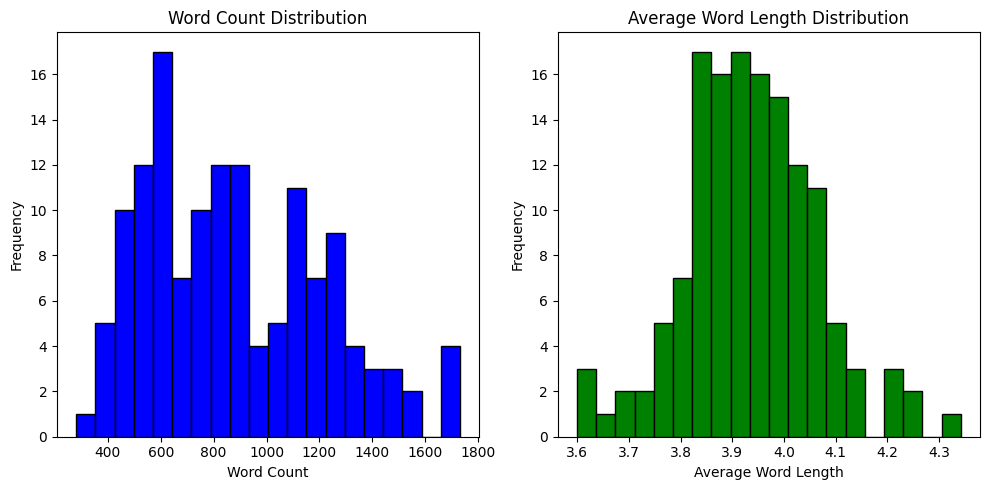

In [77]:
# Visualization
plt.figure(figsize=(10, 5))

# Plot word count
plt.subplot(1, 2, 1)
plt.hist(semantic_features['word_count'], bins=20, color='blue', edgecolor='black')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Plot average word length
plt.subplot(1, 2, 2)
plt.hist(semantic_features['avg_word_length'], bins=20, color='green', edgecolor='black')
plt.title('Average Word Length Distribution')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Sentiment Analysis with Vader


In [78]:
# Sentiment Analysis with Vader
analyzer = SentimentIntensityAnalyzer()
semantic_features['sentiment'] = transcript_prosodic['transcript'].apply(lambda x: analyzer.polarity_scores(x))

semantic_features['sentiment'].head()

,sentiment
0,"{'neg': 0.016, 'neu': 0.85, 'pos': 0.134, 'com..."
1,"{'neg': 0.03, 'neu': 0.835, 'pos': 0.135, 'com..."
2,"{'neg': 0.02, 'neu': 0.871, 'pos': 0.109, 'com..."
3,"{'neg': 0.021, 'neu': 0.816, 'pos': 0.164, 'co..."
4,"{'neg': 0.048, 'neu': 0.804, 'pos': 0.148, 'co..."


In [79]:
# Expand the sentiment scores into separate columns
sentiment_df = semantic_features['sentiment'].apply(pd.Series)

# Add the sentiment columns back to the main feature DataFrame
semantic_features = pd.concat([semantic_features, sentiment_df], axis=1)

# Drop the original dictionary column
semantic_features.drop('sentiment', axis=1, inplace=True)

# Display the updated feature DataFrame
semantic_features.head()

,Participant,word_count,avg_word_length,WRB,IN,PRP$,CC,VBD,PDT,DT,...,VBP,RB,VBN,VBG,NNS,WP,neg,neu,pos,compound
0,p1,614,4.000000,9,62,7,30,21,1,49,...,35,48,8,10,29,1,0.016,0.850,0.134,0.9958
1,p10,1148,3.889373,10,147,14,47,55,0,92,...,58,70,26,33,30,11,0.030,0.835,0.135,0.9991
2,p11,758,4.196570,5,97,21,33,23,1,59,...,48,55,10,21,32,8,0.020,0.871,0.109,0.9970
3,p12,737,3.648575,11,98,13,35,27,0,59,...,40,35,4,23,26,11,0.021,0.816,0.164,0.9989
4,p13,667,4.058471,6,79,10,31,39,0,50,...,22,50,14,17,32,5,0.048,0.804,0.148,0.9965


In [80]:
semantic_features_scores = pd.merge(semantic_features, scores_data, on='Participant')
semantic_features_scores.head()

,Participant,word_count,avg_word_length,WRB,IN,PRP$,CC,VBD,PDT,DT,...,VBN,VBG,NNS,WP,neg,neu,pos,compound,Overall,Excited
0,p1,614,4.000000,9,62,7,30,21,1,49,...,8,10,29,1,0.016,0.850,0.134,0.9958,5.297316,5.043890
1,p10,1148,3.889373,10,147,14,47,55,0,92,...,26,33,30,11,0.030,0.835,0.135,0.9991,4.725115,4.383947
2,p11,758,4.196570,5,97,21,33,23,1,59,...,10,21,32,8,0.020,0.871,0.109,0.9970,5.010430,4.297760
3,p12,737,3.648575,11,98,13,35,27,0,59,...,4,23,26,11,0.021,0.816,0.164,0.9989,5.038526,5.322526
4,p13,667,4.058471,6,79,10,31,39,0,50,...,14,17,32,5,0.048,0.804,0.148,0.9965,4.251251,3.579510


In [81]:
columns_to_include = list(semantic_features_scores.columns)
columns_to_include.remove('Participant')
print(columns_to_include)

['word_count', 'avg_word_length', 'WRB', 'IN', 'PRP$', 'CC', 'VBD', 'PDT', 'DT', 'RP', 'CD', 'JJR', "''", 'WP$', 'PRP', 'RBS', 'NN', 'EX', 'UH', 'NNP', 'RBR', 'JJ', 'WDT', 'JJS', 'MD', 'VBZ', 'TO', 'FW', 'VB', 'VBP', 'RB', 'VBN', 'VBG', 'NNS', 'WP', 'neg', 'neu', 'pos', 'compound', 'Overall', 'Excited']


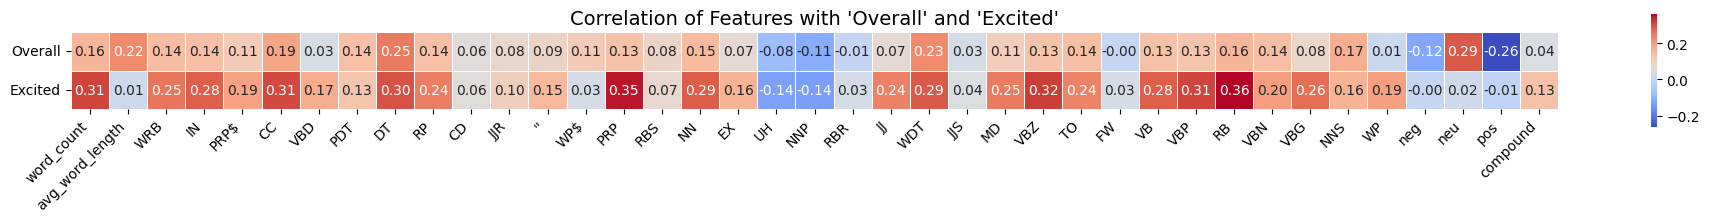

In [82]:
# List of columns to correlate with 'Overall' and 'Excited'
columns_to_include = [col for col in semantic_features_scores.columns if col not in ['Overall', 'Excited', 'Participant']]

# # Compute correlations with 'Overall' and 'Excited'
# correlations_overall = semantic_features_scores[columns_to_include].corrwith(semantic_features_scores['Overall'])
# correlations_excited = semantic_features_scores[columns_to_include].corrwith(semantic_features_scores['Excited'])

# Combine the correlations into a DataFrame for easier plotting
correlation_data = pd.DataFrame({
    'Overall': semantic_features_scores[columns_to_include].corrwith(semantic_features_scores['Overall']),
    'Excited': semantic_features_scores[columns_to_include].corrwith(semantic_features_scores['Excited'])
}).T

# Set the figure size dynamically based on the number of columns
plt.figure(figsize=(len(columns_to_include) * 0.5, 2))  # Adjust 0.5 to make it more compact or spacious

# Create the heatmap
sns.heatmap(
    correlation_data,
    annot=True,
    cmap='coolwarm',
    cbar=True,
    fmt=".2f",
    linewidths=0.5,
    square=True
)

# Add titles and labels
plt.title("Correlation of Features with 'Overall' and 'Excited'", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate column names for better readability
plt.yticks(fontsize=10)
plt.tight_layout()  # Automatically adjust spacing
plt.show()

In [83]:
correlation_data.head()

,word_count,avg_word_length,WRB,IN,PRP$,CC,VBD,PDT,DT,RP,...,VBP,RB,VBN,VBG,NNS,WP,neg,neu,pos,compound
Overall,0.156300,0.224591,0.142111,0.139709,0.113095,0.186877,0.032009,0.138606,0.246949,0.138504,...,0.126375,0.157495,0.140946,0.081863,0.171740,0.007050,-0.122899,0.287847,-0.262504,0.041302
Excited,0.312229,0.011259,0.254153,0.284633,0.191394,0.307168,0.173756,0.126079,0.298509,0.243535,...,0.313578,0.360139,0.197474,0.264080,0.161233,0.192369,-0.004358,0.015387,-0.012715,0.131849


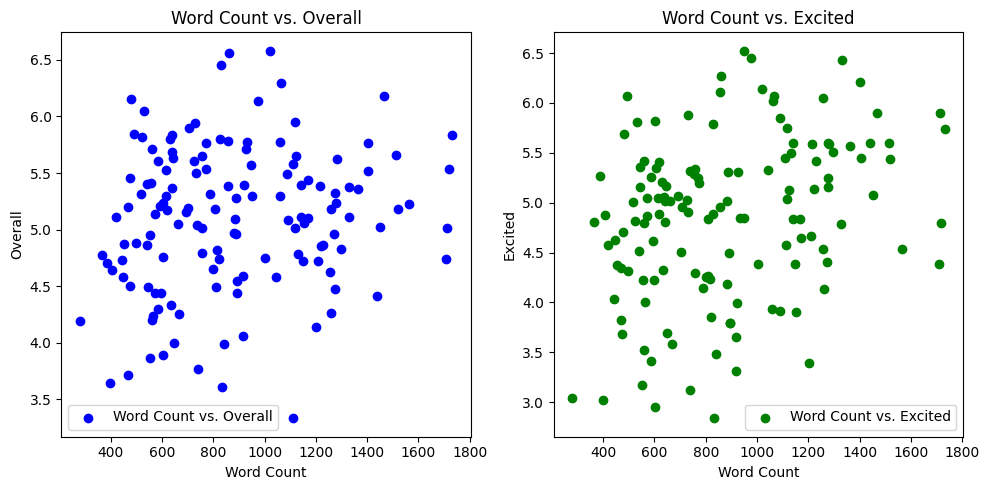

In [84]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(semantic_features_scores['word_count'], semantic_features_scores['Overall'], marker='o', linestyle='-', color='blue', label='Word Count vs. Overall')
plt.title('Word Count vs. Overall')
plt.xlabel('Word Count')
plt.ylabel('Overall')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(semantic_features_scores['word_count'], semantic_features_scores['Excited'], marker='o', linestyle='-', color='green', label='Word Count vs. Excited')
plt.title('Word Count vs. Excited')
plt.xlabel('Word Count')
plt.ylabel('Excited')
plt.legend()

plt.tight_layout()
plt.show()

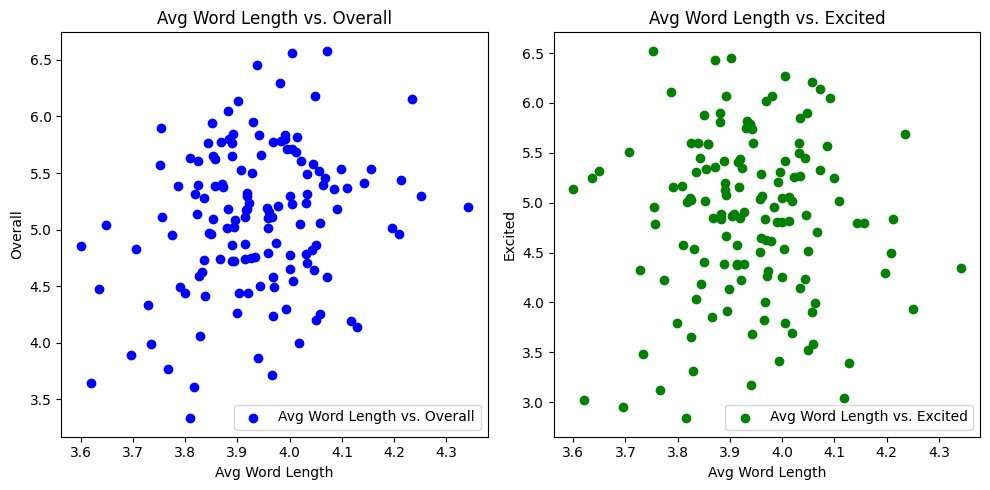

In [85]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(semantic_features_scores['avg_word_length'], semantic_features_scores['Overall'], marker='o', linestyle='-', color='blue', label='Avg Word Length vs. Overall')
plt.title('Avg Word Length vs. Overall')
plt.xlabel('Avg Word Length')
plt.ylabel('Overall')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(semantic_features_scores['avg_word_length'], semantic_features_scores['Excited'], marker='o', linestyle='-', color='green', label='Avg Word Length vs. Excited')
plt.title('Avg Word Length vs. Excited')
plt.xlabel('Avg Word Length')
plt.ylabel('Excited')
plt.legend()

plt.tight_layout()
plt.show()

In [86]:
columns_to_include = [col for col in semantic_features_scores.columns if col not in ['Overall', 'Excited', 'Participant', 'word_count', 'avg_word_length','pos', 'neg', 'neu', 'compound']]
print(columns_to_include)


['WRB', 'IN', 'PRP$', 'CC', 'VBD', 'PDT', 'DT', 'RP', 'CD', 'JJR', "''", 'WP$', 'PRP', 'RBS', 'NN', 'EX', 'UH', 'NNP', 'RBR', 'JJ', 'WDT', 'JJS', 'MD', 'VBZ', 'TO', 'FW', 'VB', 'VBP', 'RB', 'VBN', 'VBG', 'NNS', 'WP']


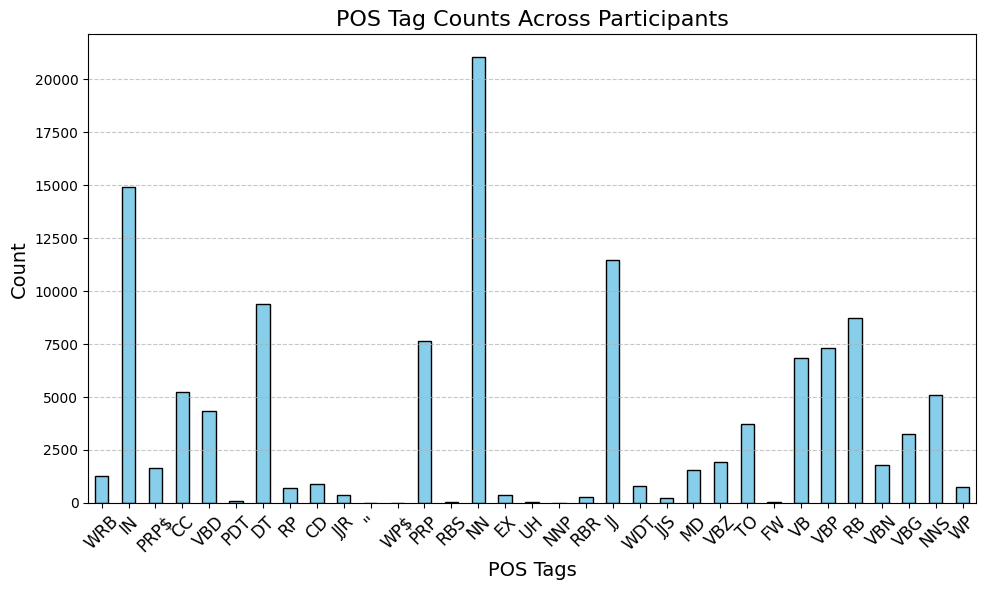

In [87]:


# Sum the counts across participants for each POS tag
pos_counts = semantic_features_scores[columns_to_include].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
pos_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('POS Tag Counts Across Participants', fontsize=16)
plt.xlabel('POS Tags', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

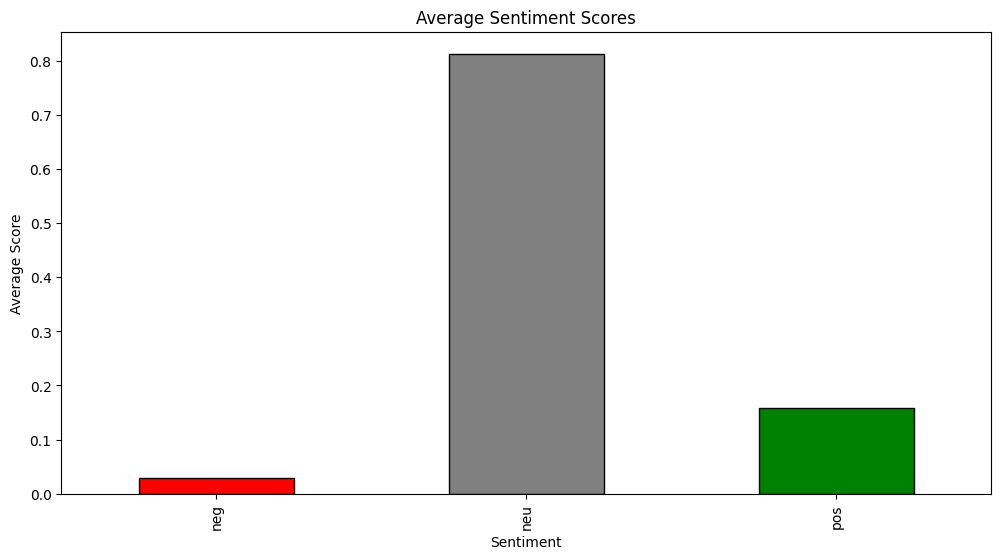

In [88]:
plt.figure(figsize=(12, 6))
semantic_features_scores[['neg', 'neu', 'pos']].mean().plot(kind='bar', color=['red', 'grey', 'green'], edgecolor='black')
plt.title('Average Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.show()

In [89]:


# List of columns to correlate with 'Overall' and 'Excited'
columns_to_include = [col for col in semantic_features_scores.columns if col not in ['Overall', 'Excited', 'Participant']]

# Scale features
scaler = StandardScaler()
semantic_features_scaled = scaler.fit_transform(semantic_features_scores[columns_to_include])


In [90]:
# Using SelectKBest with f_regression for scoring
m = 15
selector = SelectKBest(score_func=f_regression, k=m)
X_selected = selector.fit_transform(semantic_features_scaled, semantic_features_scores['Overall'])

# Get selected feature names
selected_semantic_features = semantic_features_scores[columns_to_include].columns[selector.get_support()]
print("Top m features (F-value):", selected_semantic_features.tolist())

Top m features (F-value): ['word_count', 'avg_word_length', 'WRB', 'IN', 'CC', 'PDT', 'DT', 'NN', 'WDT', 'TO', 'RB', 'VBN', 'NNS', 'neu', 'pos']


In [91]:
# mutual information for regression scoring
mi_selector = SelectKBest(score_func=mutual_info_regression, k=m)
X_mi_selected = mi_selector.fit_transform(semantic_features_scaled, scores_data['Overall'])

# Get selected feature names
mi_selected_features = semantic_features_scores[columns_to_include].columns[mi_selector.get_support()]
print("Top m features (Mutual Info):", mi_selected_features.tolist())


Top m features (Mutual Info): ['word_count', 'WRB', 'IN', 'PDT', 'DT', 'JJR', 'PRP', 'UH', 'VBZ', 'FW', 'VB', 'RB', 'NNS', 'WP', 'neu']


Word Embeddings with BERT


In [171]:
# Word embeddings with BERT (Hugging Face)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [172]:
# Separate interveiw into sentences
def process_transcript(text):
  sentences = re.split(r'(?<=\|)', text)
  cleaned_sentences = [
    re.sub(r'^(interviewer:|interviewee:)\s*', '', s.strip().replace('|', '')) for s in sentences if s.strip()
  ]
  return cleaned_sentences

transcript_prosodic['Processed Transcript'] = transcript_prosodic['transcript'].apply(process_transcript)
advanced_features = pd.DataFrame()

def get_bert_embeddings(sentences):
    embeddings = []
    for sentence in sentences:
        # Tokenize and get input Id and attention mask
        inputs = tokenizer(sentence, return_tensors="pt", padding="max_length", truncation=True, max_length=20)

        # Use BERT
        with torch.no_grad():
            outputs = model(**inputs)

        # Pool output
        cls_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
        embeddings.append(cls_embedding)

    # Combine sentence embeddings into a single 768-dimensional vector
    transcript_embedding = np.mean(embeddings, axis=0)  # Take the mean of all sentence embeddings
    return transcript_embedding

advanced_features['word embeddings'] = transcript_prosodic['Processed Transcript'].apply(get_bert_embeddings)

advanced_features['word embeddings'].head()

,word embeddings
0,"[-0.080574736, 0.19866017, 0.9045477, -0.29146..."
1,"[0.043937307, 0.21643539, 0.92145425, -0.09500..."
2,"[-0.11960937, 0.23308918, 0.2159133, -0.192303..."
3,"[-0.0072028474, 0.13329978, 0.540318, -0.26912..."
4,"[-0.11686857, -0.16834486, 0.48952198, -0.4425..."


In [173]:
advanced_features.head()

,word embeddings
0,"[-0.080574736, 0.19866017, 0.9045477, -0.29146..."
1,"[0.043937307, 0.21643539, 0.92145425, -0.09500..."
2,"[-0.11960937, 0.23308918, 0.2159133, -0.192303..."
3,"[-0.0072028474, 0.13329978, 0.540318, -0.26912..."
4,"[-0.11686857, -0.16834486, 0.48952198, -0.4425..."


In [174]:
advanced_features['word embeddings'].iloc[3].shape

(768,)

In [175]:
word_embeddings = advanced_features['word embeddings']


# Function to pad or truncate embeddings
def pad_or_truncate(embedding):
    embedding = np.array(embedding)
    return np.concatenate([embedding])

# Apply padding/truncation to all embeddings
padded_embeddings = word_embeddings.apply(lambda x: pad_or_truncate(x))

# Convert to feature matrix (2D numpy array)
advanced_feature_matrix = np.vstack(padded_embeddings)

print("Feature Matrix Shape:", advanced_feature_matrix.shape)

Feature Matrix Shape: (138, 768)


In [178]:
word_embeddings

,word embeddings
0,"[-0.080574736, 0.19866017, 0.9045477, -0.29146..."
1,"[0.043937307, 0.21643539, 0.92145425, -0.09500..."
2,"[-0.11960937, 0.23308918, 0.2159133, -0.192303..."
3,"[-0.0072028474, 0.13329978, 0.540318, -0.26912..."
4,"[-0.11686857, -0.16834486, 0.48952198, -0.4425..."
...,...
133,"[0.04657845, -0.3041721, 0.9189221, -0.0086780..."
134,"[0.16617157, -0.037156902, 0.23765954, -0.3214..."
135,"[-0.117318965, 0.10632114, 0.43225497, -0.0976..."
136,"[-0.17835292, -0.11281488, 0.7008617, -0.01517..."


In [177]:
advanced_features = pd.DataFrame(advanced_feature_matrix)
advanced_features.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.080575,0.198660,0.904548,-0.291463,0.067924,0.083894,0.649144,0.082590,0.237247,-0.492095,...,0.066892,-0.775622,-0.463681,-0.064166,-0.186102,0.152587,-0.044459,-0.307110,-0.035550,0.253304
1,0.043937,0.216435,0.921454,-0.095000,0.221988,-0.351229,0.068515,0.394245,-0.044466,-0.293525,...,-0.301254,-0.383037,0.031732,-0.123588,0.003367,-0.208671,-0.240479,-0.288032,0.107132,0.031473
2,-0.119609,0.233089,0.215913,-0.192303,0.221290,-0.094351,-0.144540,0.311336,0.084931,-0.261623,...,-0.038226,-0.178063,-0.196415,-0.160361,-0.089782,-0.153039,-0.415738,-0.236491,0.263084,0.128140
3,-0.007203,0.133300,0.540318,-0.269130,0.018763,-0.060051,0.313952,0.396858,0.061627,-0.258457,...,-0.082491,-0.253488,-0.192869,0.131291,-0.066832,0.083488,-0.479910,-0.287442,0.175348,0.193140
4,-0.116869,-0.168345,0.489522,-0.442579,0.156626,-0.160259,-0.083622,0.324934,0.134086,-0.523135,...,0.228428,-0.523800,-0.107761,0.142422,-0.116994,0.034482,-0.233010,-0.319211,0.313176,0.023816


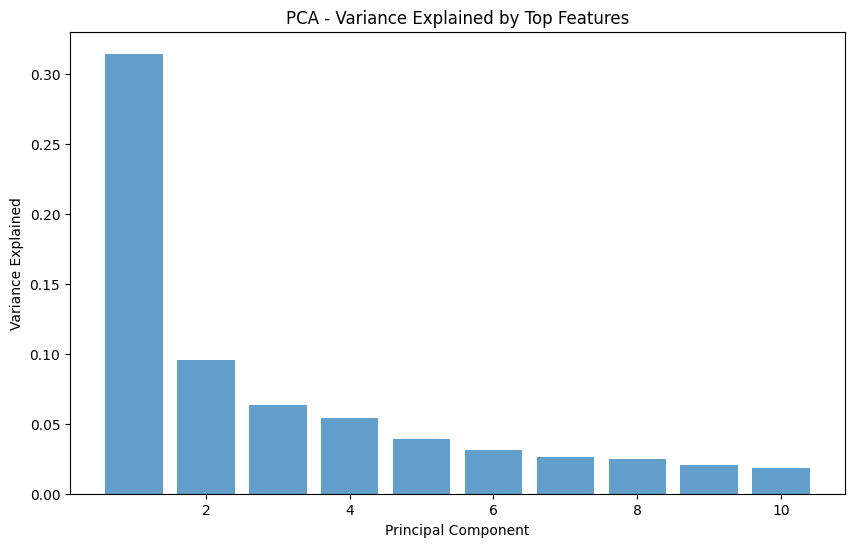

In [108]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Combine all embeddings into a single array
embeddings = advanced_features.values
pca_features = pd.DataFrame()


# Perform PCA on the combined embeddings
def perform_pca(embeddings, n_components=10):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(embeddings)
    return principal_components, pca.explained_variance_ratio_

pca_results, explained_variance_ratios = perform_pca(embeddings, n_components=10)

# Add PCA-transformed embeddings to the features DataFrame
pca_features['pca word embeddings'] = list(pca_results)

# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA - Variance Explained by Top Features')
plt.show()


In [113]:
# Expand the PCA embeddings into individual columns
pca_columns = pca_features['pca word embeddings'].apply(pd.Series)

# Rename columns to be descriptive, e.g., `PCA_1`, `PCA_2`, ...
pca_columns.columns = [f'PCA_{i+1}' for i in range(pca_columns.shape[1])]

In [114]:
pca_columns.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,0.170553,0.280320,-0.514425,-0.480636,-0.637059,0.337642,0.088492,-0.168293,0.104912,0.037549
1,-0.640362,0.466097,-0.248434,0.224444,-0.259916,-0.088268,0.028373,-0.372146,0.295569,0.036703
2,0.980338,0.100353,-0.620648,0.175977,-0.380799,-0.009104,-0.461909,0.057345,-0.243237,-0.417481
3,-0.011068,0.074486,-0.488124,-0.111407,0.045441,0.352792,-0.188229,-0.022867,-0.026531,-0.117704
4,-0.264942,-0.263039,-0.425093,0.187700,-0.106619,0.475594,0.058293,0.078092,-0.240858,0.108663


In [115]:
pca_columns.corrwith(transcript_prosodic['Overall'])

,0
PCA_1,0.131262
PCA_2,-0.105659
PCA_3,0.144061
PCA_4,-0.001381
PCA_5,0.080280
PCA_6,-0.005165
PCA_7,-0.103362
PCA_8,-0.026171
PCA_9,0.000695
PCA_10,-0.178047


In [116]:
structured_transcripts = pd.read_csv("https://raw.githubusercontent.com/gyanigk/ML-HW4/refs/heads/main/data/structured_transcripts.csv")
structured_transcripts.head()


,participant_id,question,answer
0,p1q1,So how are you doing?,Im pretty good.
1,p1q2,Ok well so please tell me about yourself.,ok uhm so have you looked at my resume or sh...
2,p1q3,mhhmm,So ah my interest kinda laid both in a little...
3,p1q4,So please tell me about a time that you demons...,Ok uhm one of the things we have to do for C...
4,p1q5,Tell me about a time when your working on a te...,Ahh I guess the easiest team project I just I...


In [ ]:
structured_transcripts.shape

(1540, 4)

Language Features Extracted:
- Syntactic Vectorization with CountVectorizer
- Syntactic Vectorization with TFIDF Vectorizer
- Word Count
- Average Word Length
- Part of Speech Tagging
- Sentiment Analysis with Vader
- Word Embedding with BERT
  
A total of 7 distinctive features.

The human readable features are: CountVectorizer because it is a count of the words throughout the interview, the Statistical Features, Part of Speech Tagging (with a little extra interpretation), and Sentiment Analysis with Vader.

Language feature selection part


In [92]:
prosodic_features = prosodic_grouped.drop(columns=['Participant'])
prosodic_features.head()

,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,diffPitchMaxMin,...,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3
0,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,0.951904,262.452159,...,86.40,0.432938,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474
1,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,0.825242,271.147575,...,149.40,0.411714,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450
2,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,0.628611,310.398937,...,120.80,0.367116,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714
3,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,0.804380,252.639984,...,92.20,0.397498,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378
4,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,1.132642,267.467513,...,96.25,0.490740,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950


In [93]:
prosodic_features.corrwith(scores_data['Overall'])

,0
duration,-0.032774
energy,-0.140545
min_pitch,-0.071553
max_pitch,-0.069795
mean_pitch,-0.102949
pitch_sd,-0.014542
pitch_abs,0.035585
pitch_quant,-0.094338
pitchUvsVRatio,0.022586
diffPitchMaxMin,-0.054988


In [94]:
prosodic_features.shape

(138, 35)

In [95]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler


# Scale features
scaler = StandardScaler()
prosodic_features_scaled = scaler.fit_transform(prosodic_features)

# Using SelectKBest with f_regression for scoring
m = 10
selector = SelectKBest(score_func=f_regression, k=m)
X_selected = selector.fit_transform(prosodic_features_scaled, scores_data['Overall'])

# Get selected feature names
selected_features = prosodic_features.columns[selector.get_support()]
print("Top m features (F-value):", selected_features.tolist())

Top m features (F-value): ['energy', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_quant', 'diffIntMaxMode', 'jitter', 'shimmer', 'maxDurPause', 'avgDurPause']


In [96]:
# mutual information for regression scoring
mi_selector = SelectKBest(score_func=mutual_info_regression, k=m)
X_mi_selected = mi_selector.fit_transform(prosodic_features_scaled, scores_data['Overall'])

# Get selected feature names
mi_selected_features = prosodic_features.columns[mi_selector.get_support()]
print("Top m features (Mutual Info):", mi_selected_features.tolist())


Top m features (Mutual Info): ['pitch_sd', 'pitch_quant', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'diffIntMaxMode', 'avgBand2', 'avgBand3', 'shimmer', 'avgDurPause']


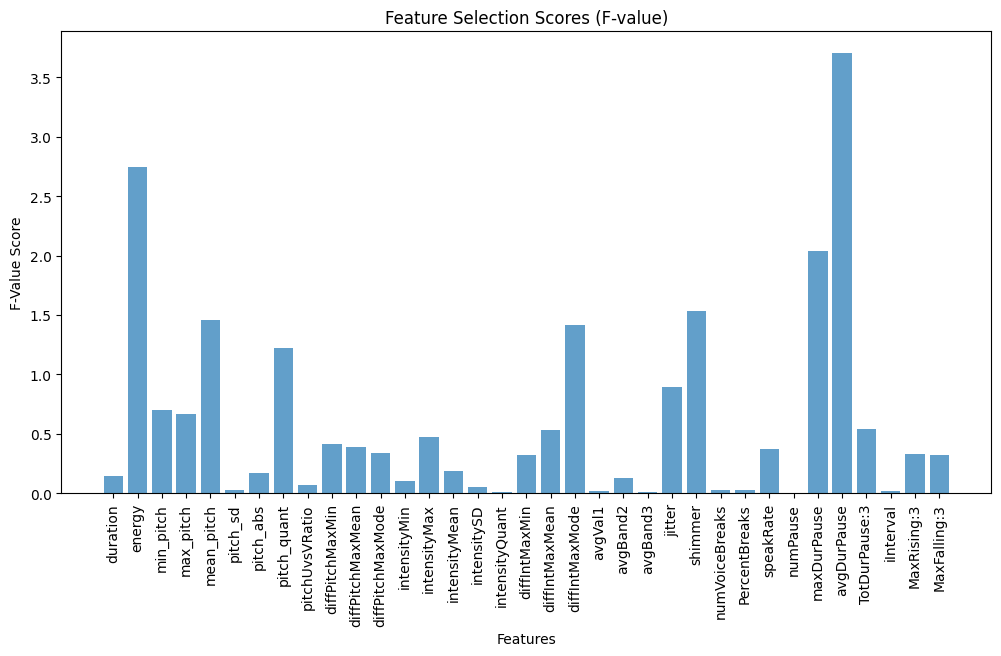

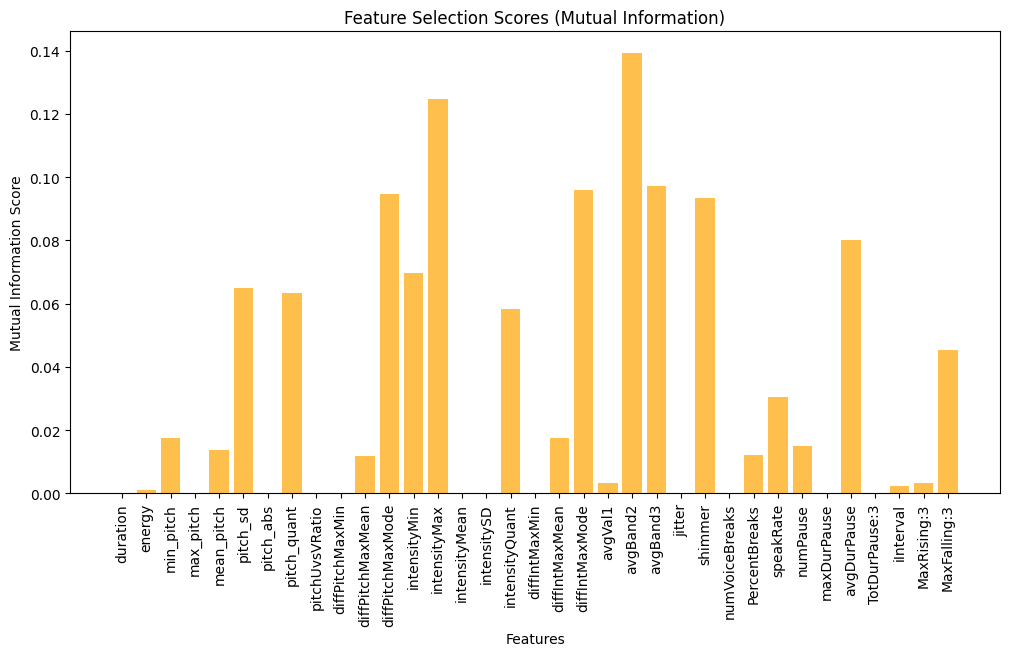

In [97]:
# F-value scores
f_scores = selector.scores_

# Visualize F-value scores
plt.figure(figsize=(12, 6))
plt.bar(prosodic_features.columns, f_scores, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-Value Score')
plt.title('Feature Selection Scores (F-value)')
plt.show()

# Mutual Information Scores (Optional)
mi_scores = mi_selector.scores_
plt.figure(figsize=(12, 6))
plt.bar(prosodic_features.columns, mi_scores, alpha=0.7, color='orange')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Feature Selection Scores (Mutual Information)')
plt.show()


In [233]:
# Intersection of selected features
intersection_features = set(selected_features).intersection(mi_selected_features)
print("Common features:", list(intersection_features))


Common features: ['avgDurPause', 'diffIntMaxMode', 'shimmer', 'pitch_quant']


In [234]:
# Union of selected features
union_features = set(selected_features).union(mi_selected_features)
print("Hybrid feature set:", list(union_features))


Hybrid feature set: ['intensityMax', 'avgBand2', 'shimmer', 'mean_pitch', 'pitch_quant', 'diffIntMaxMode', 'avgBand3', 'avgDurPause', 'maxDurPause', 'intensityMin', 'pitch_sd', 'energy', 'jitter', 'diffPitchMaxMode', 'max_pitch', 'min_pitch']


In [99]:
prosodic_scores = pd.merge(prosodic_grouped, scores_data, on='Participant')
prosodic_scores.head()

,Participant,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Overall,Excited
0,p1,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,0.951904,...,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474,5.297316,5.043890
1,p10,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,0.825242,...,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450,4.725115,4.383947
2,p11,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,0.628611,...,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714,5.010430,4.297760
3,p12,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,0.804380,...,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378,5.038526,5.322526
4,p13,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,1.132642,...,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950,4.251251,3.579510


In [102]:
prosodic_scores.shape

(138, 38)

In [235]:
feature_sets = {
    "FS1": prosodic_scores[selected_features],
    "FS2": prosodic_scores[mi_selected_features],
    "FS3": prosodic_scores[list(intersection_features)],
    "FS4": prosodic_scores[list(union_features)],
}


In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

# Placeholder for results
results = {}

# Assuming `feature_sets` is a dictionary where keys are feature set names and values are DataFrames
for feature_set_name, features in feature_sets.items():
    results[feature_set_name] = {'Pearson_r_Overall': [], 'RE_Overall': []}



    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(prosodic_scores, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_overall = train_set['Overall']
        X_val = val_set[features.columns]
        y_val_overall = val_set['Overall']

        # Train Random Forest model on training data
        rf = RandomForestRegressor()
        rf.fit(X_train, y_train_overall)

        # Validate the model on the validation set
        y_pred_overall = rf.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'Overall'
        r_overall, _ = pearsonr(y_val_overall, y_pred_overall)
        re_overall = np.mean(np.abs((y_val_overall - y_pred_overall) / y_val_overall))

        # Store fold results
        results[feature_set_name]['Pearson_r_Overall'].append(r_overall)
        results[feature_set_name]['RE_Overall'].append(re_overall)

    # Average metrics over all folds
    results[feature_set_name]['Mean_Pearson_r_Overall'] = np.mean(results[feature_set_name]['Pearson_r_Overall'])
    results[feature_set_name]['Mean_RE_Overall'] = np.mean(results[feature_set_name]['RE_Overall'])

# Print results
for feature_set, metrics in results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (Overall): {metrics['Mean_Pearson_r_Overall']}")
    print(f"Mean Relative Error (Overall): {metrics['Mean_RE_Overall']}")
    print()

Feature Set: FS1
Mean Pearson r (Overall): 0.42343181852927236
Mean Relative Error (Overall): 0.10275289289871758

Feature Set: FS2
Mean Pearson r (Overall): 0.41230944145054166
Mean Relative Error (Overall): 0.10021589554595431

Feature Set: FS3
Mean Pearson r (Overall): 0.18288909503915302
Mean Relative Error (Overall): 0.113179210722904

Feature Set: FS4
Mean Pearson r (Overall): 0.4436417784247036
Mean Relative Error (Overall): 0.09923420892755982



In [140]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Placeholder for results
bagging_results = {}

for feature_set_name, features in feature_sets.items():
    bagging_results[feature_set_name] = {'Pearson_r_Overall': [], 'RE_Overall': []}

    X = features
    y_overall = scores_data['Overall']

    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(prosodic_scores, fold,test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_overall = train_set['Overall']
        X_val = val_set[features.columns]
        y_val_overall = val_set['Overall']

        # Train Bagging Regressor
        bagging_model = BaggingRegressor( n_estimators=50, random_state=42)
        bagging_model.fit(X_train, y_train_overall)

        # Validate the model on the validation set
        y_pred_overall = bagging_model.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'Overall'
        r_overall, _ = pearsonr(y_val_overall, y_pred_overall)
        re_overall = np.mean(np.abs((y_val_overall - y_pred_overall) / y_val_overall))

        # Store fold results
        bagging_results[feature_set_name]['Pearson_r_Overall'].append(r_overall)
        bagging_results[feature_set_name]['RE_Overall'].append(re_overall)

    # Average metrics over all folds
    bagging_results[feature_set_name]['Mean_Pearson_r_Overall'] = np.mean(bagging_results[feature_set_name]['Pearson_r_Overall'])
    bagging_results[feature_set_name]['Mean_RE_Overall'] = np.mean(bagging_results[feature_set_name]['RE_Overall'])

# Print Bagging results
print("\nBagging Results:")
for feature_set, metrics in bagging_results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (Overall): {metrics['Mean_Pearson_r_Overall']}")
    print(f"Mean Relative Error (Overall): {metrics['Mean_RE_Overall']}")
    print()



Bagging Results:
Feature Set: FS1
Mean Pearson r (Overall): 0.4037031447225516
Mean Relative Error (Overall): 0.10277783822515099

Feature Set: FS2
Mean Pearson r (Overall): 0.3830264352158263
Mean Relative Error (Overall): 0.10141011762039187

Feature Set: FS3
Mean Pearson r (Overall): 0.1502859416070535
Mean Relative Error (Overall): 0.11481737498064445

Feature Set: FS4
Mean Pearson r (Overall): 0.39782992118988625
Mean Relative Error (Overall): 0.10267910827598789



In [143]:
from sklearn.ensemble import AdaBoostRegressor

# Placeholder for results
boosting_results = {}

for feature_set_name, features in feature_sets.items():
    boosting_results[feature_set_name] = {'Pearson_r_Overall': [], 'RE_Overall': []}

    X = features
    y_overall = scores_data['Overall']

    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(prosodic_scores, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_overall = train_set['Overall']
        X_val = val_set[features.columns]
        y_val_overall = val_set['Overall']

        # Train AdaBoost Regressor with Decision Trees
        adaboost_model = AdaBoostRegressor( n_estimators=50, random_state=42)
        adaboost_model.fit(X_train, y_train_overall)

        # Validate the model on the validation set
        y_pred_overall = adaboost_model.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'Overall'
        r_overall, _ = pearsonr(y_val_overall, y_pred_overall)
        re_overall = np.mean(np.abs((y_val_overall - y_pred_overall) / y_val_overall))

        # Store fold results
        boosting_results[feature_set_name]['Pearson_r_Overall'].append(r_overall)
        boosting_results[feature_set_name]['RE_Overall'].append(re_overall)

    # Average metrics over all folds
    boosting_results[feature_set_name]['Mean_Pearson_r_Overall'] = np.mean(boosting_results[feature_set_name]['Pearson_r_Overall'])
    boosting_results[feature_set_name]['Mean_RE_Overall'] = np.mean(boosting_results[feature_set_name]['RE_Overall'])

# Print Boosting results
print("\nBoosting Results:")
for feature_set, metrics in boosting_results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (Overall): {metrics['Mean_Pearson_r_Overall']}")
    print(f"Mean Relative Error (Overall): {metrics['Mean_RE_Overall']}")
    print()



Boosting Results:
Feature Set: FS1
Mean Pearson r (Overall): 0.45061278048202824
Mean Relative Error (Overall): 0.09964516668585041

Feature Set: FS2
Mean Pearson r (Overall): 0.3941770904088192
Mean Relative Error (Overall): 0.10244513652932001

Feature Set: FS3
Mean Pearson r (Overall): 0.18803870595270047
Mean Relative Error (Overall): 0.10915747322964606

Feature Set: FS4
Mean Pearson r (Overall): 0.42807369190720224
Mean Relative Error (Overall): 0.10090812220130603



In [144]:
from xgboost import XGBRegressor

# Placeholder for results
boosting_results = {}

for feature_set_name, features in feature_sets.items():
    boosting_results[feature_set_name] = {'Pearson_r_Overall': [], 'RE_Overall': []}

    X = features
    y_overall = scores_data['Overall']

    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(prosodic_scores, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_overall = train_set['Overall']
        X_val = val_set[features.columns]
        y_val_overall = val_set['Overall']

        # Train AdaBoost Regressor with Decision Trees
        xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
        xgb_model.fit(X_train, y_train_overall)

        # Validate the model on the validation set
        y_pred_overall = xgb_model.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'Overall'
        r_overall, _ = pearsonr(y_val_overall, y_pred_overall)
        re_overall = np.mean(np.abs((y_val_overall - y_pred_overall) / y_val_overall))

        # Store fold results
        boosting_results[feature_set_name]['Pearson_r_Overall'].append(r_overall)
        boosting_results[feature_set_name]['RE_Overall'].append(re_overall)

    # Average metrics over all folds
    boosting_results[feature_set_name]['Mean_Pearson_r_Overall'] = np.mean(boosting_results[feature_set_name]['Pearson_r_Overall'])
    boosting_results[feature_set_name]['Mean_RE_Overall'] = np.mean(boosting_results[feature_set_name]['RE_Overall'])

# Print Boosting results
print("\nBoosting Results:")
for feature_set, metrics in boosting_results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (Overall): {metrics['Mean_Pearson_r_Overall']}")
    print(f"Mean Relative Error (Overall): {metrics['Mean_RE_Overall']}")
    print()



Boosting Results:
Feature Set: FS1
Mean Pearson r (Overall): 0.30136639430471374
Mean Relative Error (Overall): 0.11190316835604239

Feature Set: FS2
Mean Pearson r (Overall): 0.40097900501317313
Mean Relative Error (Overall): 0.10361255421975724

Feature Set: FS3
Mean Pearson r (Overall): 0.14194207234859585
Mean Relative Error (Overall): 0.11909342686618207

Feature Set: FS4
Mean Pearson r (Overall): 0.32914899516125506
Mean Relative Error (Overall): 0.10689454136593153



In [ ]:
best_features = list(feature_sets['FS1'].columns)

In [147]:
# Combine train and validation sets for final training
X_final_train = pd.concat([train_set[best_features], val_set[best_features]])
y_final_train_overall = pd.concat([train_set['Overall'], val_set['Overall']])

# Train model on the combined training set
adaboost_model = AdaBoostRegressor( n_estimators=50, random_state=42)
adaboost_model.fit(X_final_train, y_final_train_overall)

# Evaluate on the test set
X_test = test_set[best_features]
y_test_overall = test_set['Overall']
y_test_pred_overall = adaboost_model.predict(X_test)

# Final metrics
r_test, _ = pearsonr(y_test_overall, y_test_pred_overall)
re_test = np.mean(np.abs((y_test_overall - y_test_pred_overall) / y_test_overall))

print(f"Final Test Pearson r (Overall): {r_test}")
print(f"Final Test Relative Error (Overall): {re_test}")


Final Test Pearson r (Overall): 0.014176580281603013
Final Test Relative Error (Overall): 0.08794147398423564


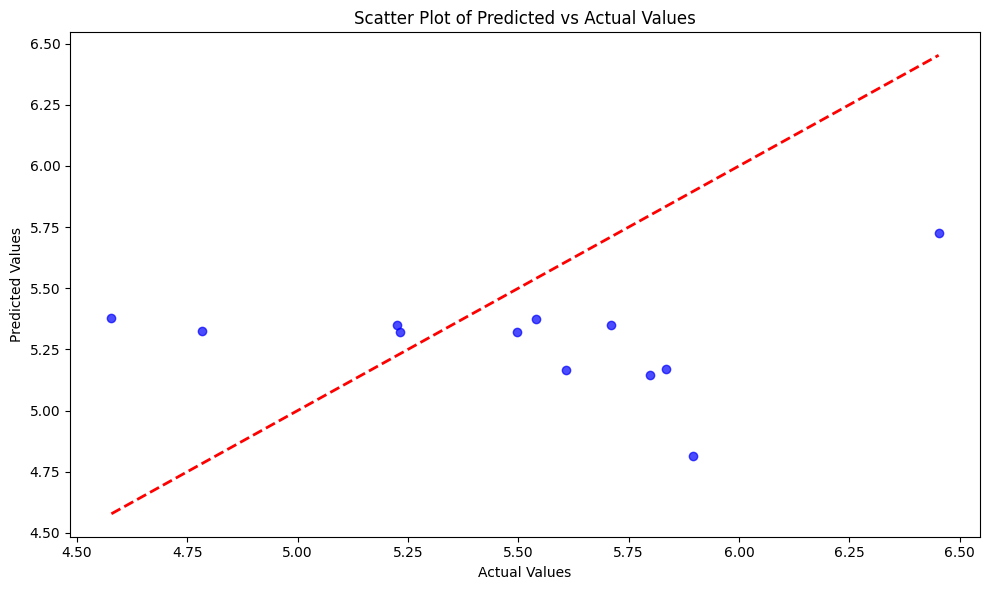

In [149]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_overall, y_test_pred_overall, alpha=0.7, color='blue')
plt.plot([min(y_test_overall), max(y_test_overall)], [min(y_test_overall), max(y_test_overall)], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.tight_layout()
plt.show()

In [223]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_dim):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='linear')  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae',pearson_correlation])
    return model


In [224]:
import tensorflow.keras.backend as K

def pearson_correlation(y_true, y_pred):
    x = y_true - K.mean(y_true)
    y = y_pred - K.mean(y_pred)
    r = K.sum(x * y) / (K.sqrt(K.sum(K.square(x))) * K.sqrt(K.sum(K.square(y))))
    return r


In [227]:
for feature_set_name, features in feature_sets.items():
  print(feature_set_name)


FS1
FS2
FS3
FS4


In [245]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import numpy as np

results = {}
for feature_set_name, features in feature_sets.items():
    results[feature_set_name] = {}
    X = features
    y_overall = scores_data['Overall']
    y_excited = scores_data['Excited']

    fold_metrics = []

    for fold in range(5):
        # Split data
        train_set, val_set, test_set = get_data_splits(prosodic_scores, fold, test_set_participants, interview_folds)

        X_train = train_set[features.columns]
        y_train_overall = train_set['Overall']
        X_val = val_set[features.columns]
        y_val_overall = val_set['Overall']
        X_test = test_set[features.columns]
        y_test_overall = test_set['Overall']

        # Build and train the model
        model = build_model(input_dim=X_train.shape[1])
        history = model.fit(
            X_train, y_train_overall,
            validation_data=(X_val, y_val_overall),
            epochs=50,
            batch_size=16,
            verbose=0
        )

        # Evaluate on the test set
        y_pred_overall = model.predict(X_test).flatten()
        r_overall, _ = pearsonr(y_test_overall, y_pred_overall)
        re_overall = np.mean(np.abs((y_test_overall - y_pred_overall) / y_test_overall))

        fold_metrics.append({"Pearson_r_Overall": r_overall,
            "RE_Overall": re_overall})

    # Average across folds
    avg_r = np.mean([m['Pearson_r_Overall'] for m in fold_metrics])
    avg_re = np.mean([m['RE_Overall'] for m in fold_metrics])
    results[feature_set_name]['NeuralNetwork'] = {
        'Pearson_r_Overall': avg_r,
        'RE_Overall': avg_re,
    }


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [246]:
results

{'FS1': {'NeuralNetwork': {'Pearson_r_Overall': -0.16117721639319937,
   'RE_Overall': 0.46777861845895713}},
 'FS2': {'NeuralNetwork': {'Pearson_r_Overall': -0.13634284746409672,
   'RE_Overall': 0.48615813245329875}},
 'FS3': {'NeuralNetwork': {'Pearson_r_Overall': -0.042119168141676044,
   'RE_Overall': 0.40976898927076333}},
 'FS4': {'NeuralNetwork': {'Pearson_r_Overall': -0.22171796189415155,
   'RE_Overall': 0.47142153414680754}}}

## Predicting Excited

In [237]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler


# Scale features
scaler = StandardScaler()
prosodic_features_scaled = scaler.fit_transform(prosodic_features)

# Using SelectKBest with f_regression for scoring
m = 10
selector = SelectKBest(score_func=f_regression, k=m)
X_selected = selector.fit_transform(prosodic_features_scaled, scores_data['Excited'])

# Get selected feature names
selected_features = prosodic_features.columns[selector.get_support()]
print("Top m features (F-value):", selected_features.tolist())

Top m features (F-value): ['energy', 'mean_pitch', 'pitch_abs', 'pitch_quant', 'intensitySD', 'diffIntMaxMean', 'jitter', 'shimmer', 'maxDurPause', 'avgDurPause']


In [238]:
# mutual information for regression scoring
mi_selector = SelectKBest(score_func=mutual_info_regression, k=m)
X_mi_selected = mi_selector.fit_transform(prosodic_features_scaled, scores_data['Excited'])

# Get selected feature names
mi_selected_features = prosodic_features.columns[mi_selector.get_support()]
print("Top m features (Mutual Info):", mi_selected_features.tolist())


Top m features (Mutual Info): ['mean_pitch', 'pitch_abs', 'diffPitchMaxMode', 'intensityMean', 'diffIntMaxMean', 'diffIntMaxMode', 'jitter', 'shimmer', 'avgDurPause', 'MaxFalling:3']


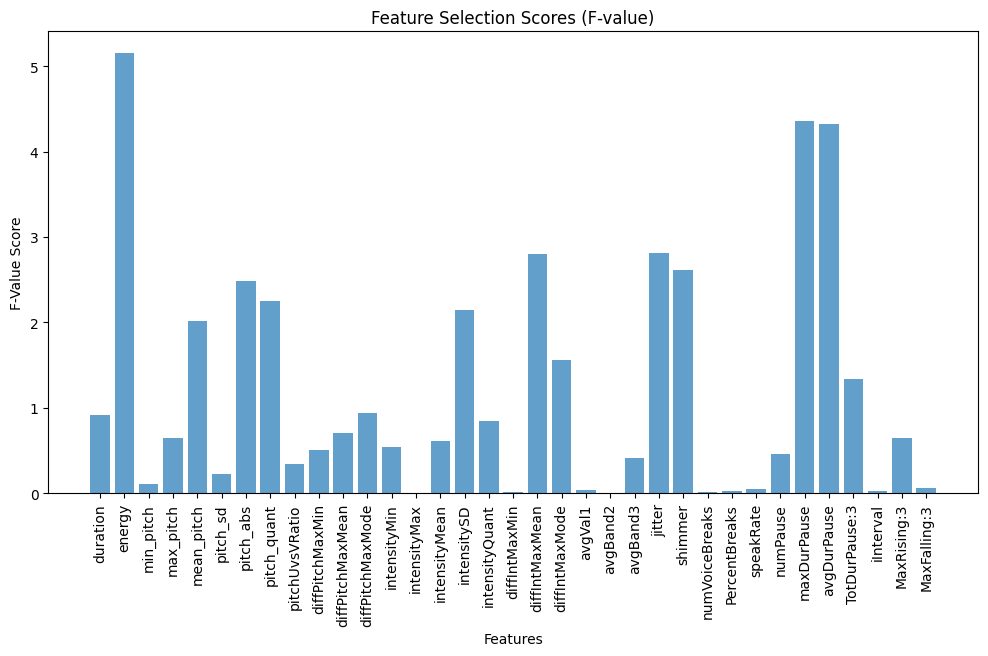

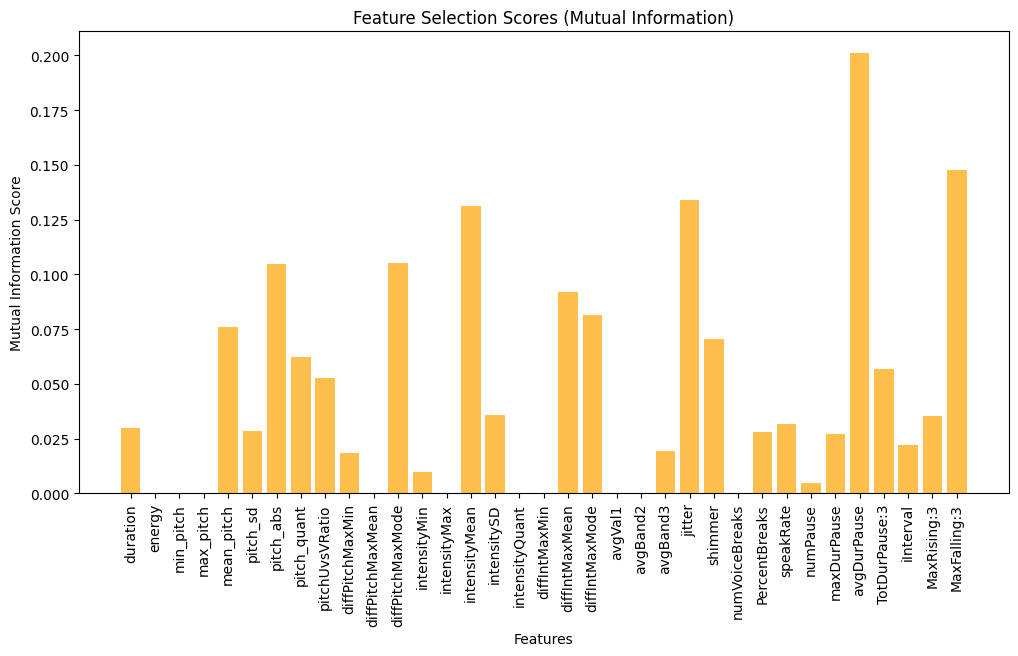

In [239]:
# F-value scores
f_scores = selector.scores_

# Visualize F-value scores
plt.figure(figsize=(12, 6))
plt.bar(prosodic_features.columns, f_scores, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-Value Score')
plt.title('Feature Selection Scores (F-value)')
plt.show()

# Mutual Information Scores (Optional)
mi_scores = mi_selector.scores_
plt.figure(figsize=(12, 6))
plt.bar(prosodic_features.columns, mi_scores, alpha=0.7, color='orange')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Feature Selection Scores (Mutual Information)')
plt.show()


In [240]:
# Intersection of selected features
intersection_features = set(selected_features).intersection(mi_selected_features)
print("Common features:", list(intersection_features))


Common features: ['diffIntMaxMean', 'avgDurPause', 'mean_pitch', 'shimmer', 'pitch_abs', 'jitter']


In [241]:
# Union of selected features
union_features = set(selected_features).union(mi_selected_features)
print("Hybrid feature set:", list(union_features))


Hybrid feature set: ['shimmer', 'mean_pitch', 'pitch_quant', 'intensitySD', 'MaxFalling:3', 'diffIntMaxMode', 'intensityMean', 'avgDurPause', 'maxDurPause', 'diffPitchMaxMode', 'energy', 'diffIntMaxMean', 'pitch_abs', 'jitter']


In [249]:
feature_sets = {
    "FS1": prosodic_scores[selected_features],
    "FS2": prosodic_scores[mi_selected_features],
    "FS3": prosodic_scores[list(intersection_features)],
    "FS4": prosodic_scores[list(union_features)],
}


In [250]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

# Placeholder for results
results = {}

# Assuming `feature_sets` is a dictionary where keys are feature set names and values are DataFrames
for feature_set_name, features in feature_sets.items():
    results[feature_set_name] = {'Pearson_r_excited': [], 'RE_excited': []}



    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(prosodic_scores, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_excited = train_set['Excited']
        X_val = val_set[features.columns]
        y_val_excited = val_set['Excited']

        # Train Random Forest model on training data
        rf = RandomForestRegressor()
        rf.fit(X_train, y_train_excited)

        # Validate the model on the validation set
        y_pred_excited = rf.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'excited'
        r_excited, _ = pearsonr(y_val_excited, y_pred_excited)
        re_excited = np.mean(np.abs((y_val_excited - y_pred_excited) / y_val_excited))

        # Store fold results
        results[feature_set_name]['Pearson_r_excited'].append(r_excited)
        results[feature_set_name]['RE_excited'].append(re_excited)

    # Average metrics over all folds
    results[feature_set_name]['Mean_Pearson_r_excited'] = np.mean(results[feature_set_name]['Pearson_r_excited'])
    results[feature_set_name]['Mean_RE_excited'] = np.mean(results[feature_set_name]['RE_excited'])

# Print results
for feature_set, metrics in results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (Excited): {metrics['Mean_Pearson_r_excited']}")
    print(f"Mean Relative Error (Excited): {metrics['Mean_RE_excited']}")
    print()

Feature Set: FS1
Mean Pearson r (Excited): 0.645424540443098
Mean Relative Error (Excited): 0.1216102042346775

Feature Set: FS2
Mean Pearson r (Excited): 0.6324988883905899
Mean Relative Error (Excited): 0.12317251454855471

Feature Set: FS3
Mean Pearson r (Excited): 0.4558018589902136
Mean Relative Error (Excited): 0.13641809239776106

Feature Set: FS4
Mean Pearson r (Excited): 0.6384933512110817
Mean Relative Error (Excited): 0.12412688072491854



In [251]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Placeholder for results
bagging_results = {}

for feature_set_name, features in feature_sets.items():
    bagging_results[feature_set_name] = {'Pearson_r_excited': [], 'RE_excited': []}

    X = features
    y_excited = scores_data['Excited']

    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(prosodic_scores, fold,test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_excited = train_set['Excited']
        X_val = val_set[features.columns]
        y_val_excited = val_set['Excited']

        # Train Bagging Regressor
        bagging_model = BaggingRegressor( n_estimators=50, random_state=42)
        bagging_model.fit(X_train, y_train_excited)

        # Validate the model on the validation set
        y_pred_excited = bagging_model.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'excited'
        r_excited, _ = pearsonr(y_val_excited, y_pred_excited)
        re_excited = np.mean(np.abs((y_val_excited - y_pred_excited) / y_val_excited))

        # Store fold results
        bagging_results[feature_set_name]['Pearson_r_excited'].append(r_excited)
        bagging_results[feature_set_name]['RE_excited'].append(re_excited)

    # Average metrics over all folds
    bagging_results[feature_set_name]['Mean_Pearson_r_excited'] = np.mean(bagging_results[feature_set_name]['Pearson_r_excited'])
    bagging_results[feature_set_name]['Mean_RE_excited'] = np.mean(bagging_results[feature_set_name]['RE_excited'])

# Print Bagging results
print("\nBagging Results:")
for feature_set, metrics in bagging_results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (excited): {metrics['Mean_Pearson_r_excited']}")
    print(f"Mean Relative Error (excited): {metrics['Mean_RE_excited']}")
    print()



Bagging Results:
Feature Set: FS1
Mean Pearson r (excited): 0.649359806180079
Mean Relative Error (excited): 0.12095717254181851

Feature Set: FS2
Mean Pearson r (excited): 0.6223924846504602
Mean Relative Error (excited): 0.12433773356970453

Feature Set: FS3
Mean Pearson r (excited): 0.44984625497384395
Mean Relative Error (excited): 0.1374126796604612

Feature Set: FS4
Mean Pearson r (excited): 0.6265424489842084
Mean Relative Error (excited): 0.12283910838274123



In [252]:
from sklearn.ensemble import AdaBoostRegressor

# Placeholder for results
boosting_results = {}

for feature_set_name, features in feature_sets.items():
    boosting_results[feature_set_name] = {'Pearson_r_excited': [], 'RE_excited': []}

    X = features
    y_overall = scores_data['Excited']

    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(prosodic_scores, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_excited = train_set['Excited']
        X_val = val_set[features.columns]
        y_val_excited = val_set['Excited']

        # Train AdaBoost Regressor with Decision Trees
        adaboost_model = AdaBoostRegressor( n_estimators=50, random_state=42)
        adaboost_model.fit(X_train, y_train_excited)

        # Validate the model on the validation set
        y_pred_excited = adaboost_model.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'excited'
        r_excited, _ = pearsonr(y_val_excited, y_pred_excited)
        re_excited = np.mean(np.abs((y_val_excited - y_pred_excited) / y_val_excited))

        # Store fold results
        boosting_results[feature_set_name]['Pearson_r_excited'].append(r_excited)
        boosting_results[feature_set_name]['RE_excited'].append(re_excited)

    # Average metrics over all folds
    boosting_results[feature_set_name]['Mean_Pearson_r_excited'] = np.mean(boosting_results[feature_set_name]['Pearson_r_excited'])
    boosting_results[feature_set_name]['Mean_RE_excited'] = np.mean(boosting_results[feature_set_name]['RE_excited'])

# Print Boosting results
print("\nBoosting Results:")
for feature_set, metrics in boosting_results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (excited): {metrics['Mean_Pearson_r_excited']}")
    print(f"Mean Relative Error (excited): {metrics['Mean_RE_excited']}")
    print()



Boosting Results:
Feature Set: FS1
Mean Pearson r (excited): 0.6520559318463871
Mean Relative Error (excited): 0.1234502922923812

Feature Set: FS2
Mean Pearson r (excited): 0.6278915559852092
Mean Relative Error (excited): 0.12291426446794429

Feature Set: FS3
Mean Pearson r (excited): 0.4745474690377673
Mean Relative Error (excited): 0.14009955230747867

Feature Set: FS4
Mean Pearson r (excited): 0.640916475203689
Mean Relative Error (excited): 0.12461686270135788



In [254]:
from xgboost import XGBRegressor

# Placeholder for results
boosting_results = {}

for feature_set_name, features in feature_sets.items():
    boosting_results[feature_set_name] = {'Pearson_r_excited': [], 'RE_excited': []}

    X = features
    y_excited = scores_data['Excited']

    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(prosodic_scores, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_excited = train_set['Excited']
        X_val = val_set[features.columns]
        y_val_excited = val_set['Excited']

        # Train AdaBoost Regressor with Decision Trees
        xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
        xgb_model.fit(X_train, y_train_excited)

        # Validate the model on the validation set
        y_pred_excited = xgb_model.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'excited'
        r_excited, _ = pearsonr(y_val_excited, y_pred_excited)
        re_excited = np.mean(np.abs((y_val_excited - y_pred_excited) / y_val_excited))

        # Store fold results
        boosting_results[feature_set_name]['Pearson_r_excited'].append(r_excited)
        boosting_results[feature_set_name]['RE_excited'].append(re_excited)

    # Average metrics over all folds
    boosting_results[feature_set_name]['Mean_Pearson_r_excited'] = np.mean(boosting_results[feature_set_name]['Pearson_r_excited'])
    boosting_results[feature_set_name]['Mean_RE_excited'] = np.mean(boosting_results[feature_set_name]['RE_excited'])

# Print Boosting results
print("\nBoosting Results:")
for feature_set, metrics in boosting_results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (excited): {metrics['Mean_Pearson_r_excited']}")
    print(f"Mean Relative Error (excited): {metrics['Mean_RE_excited']}")
    print()



Boosting Results:
Feature Set: FS1
Mean Pearson r (excited): 0.5579524837535663
Mean Relative Error (excited): 0.1338092399544774

Feature Set: FS2
Mean Pearson r (excited): 0.5621515503043282
Mean Relative Error (excited): 0.13854510920900015

Feature Set: FS3
Mean Pearson r (excited): 0.32388340769164736
Mean Relative Error (excited): 0.15509816366323706

Feature Set: FS4
Mean Pearson r (excited): 0.5901248910977274
Mean Relative Error (excited): 0.12939110845644425



In [255]:
best_features = list(feature_sets['FS1'].columns)

In [256]:
# Combine train and validation sets for final training
X_final_train = pd.concat([train_set[best_features], val_set[best_features]])
y_final_train_overall = pd.concat([train_set['Overall'], val_set['Overall']])

# Train model on the combined training set
adaboost_model = AdaBoostRegressor( n_estimators=50, random_state=42)
adaboost_model.fit(X_final_train, y_final_train_overall)

# Evaluate on the test set
X_test = test_set[best_features]
y_test_overall = test_set['Overall']
y_test_pred_overall = adaboost_model.predict(X_test)

# Final metrics
r_test, _ = pearsonr(y_test_overall, y_test_pred_overall)
re_test = np.mean(np.abs((y_test_overall - y_test_pred_overall) / y_test_overall))

print(f"Final Test Pearson r (Overall): {r_test}")
print(f"Final Test Relative Error (Overall): {re_test}")


Final Test Pearson r (Overall): 0.4990754338639159
Final Test Relative Error (Overall): 0.0722851430424752


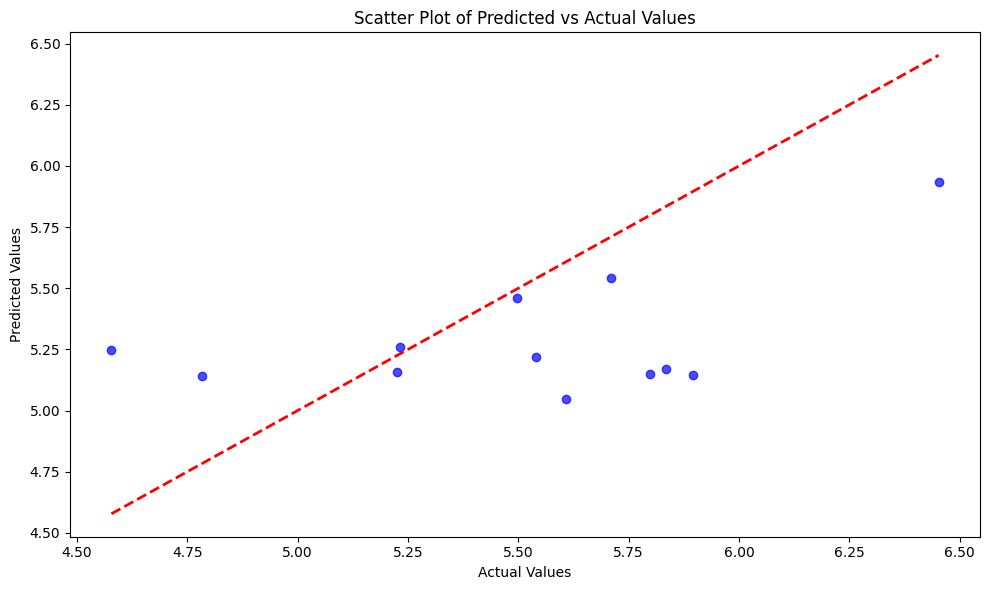

In [257]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_overall, y_test_pred_overall, alpha=0.7, color='blue')
plt.plot([min(y_test_overall), max(y_test_overall)], [min(y_test_overall), max(y_test_overall)], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.tight_layout()
plt.show()

In [258]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_dim):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='linear')  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae',pearson_correlation])
    return model


In [259]:
import tensorflow.keras.backend as K

def pearson_correlation(y_true, y_pred):
    x = y_true - K.mean(y_true)
    y = y_pred - K.mean(y_pred)
    r = K.sum(x * y) / (K.sqrt(K.sum(K.square(x))) * K.sqrt(K.sum(K.square(y))))
    return r


In [260]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import numpy as np

results = {}
for feature_set_name, features in feature_sets.items():
    results[feature_set_name] = {}
    X = features
    y_excited = scores_data['Excited']
    y_excited = scores_data['Excited']

    fold_metrics = []

    for fold in range(5):
        # Split data
        train_set, val_set, test_set = get_data_splits(prosodic_scores, fold, test_set_participants, interview_folds)

        X_train = train_set[features.columns]
        y_train_excited = train_set['Excited']
        X_val = val_set[features.columns]
        y_val_excited = val_set['Excited']
        X_test = test_set[features.columns]
        y_test_excited = test_set['Excited']

        # Build and train the model
        model = build_model(input_dim=X_train.shape[1])
        history = model.fit(
            X_train, y_train_excited,
            validation_data=(X_val, y_val_excited),
            epochs=50,
            batch_size=16,
            verbose=0
        )

        # Evaluate on the test set
        y_pred_excited = model.predict(X_test).flatten()
        r_excited, _ = pearsonr(y_test_excited, y_pred_excited)
        re_excited = np.mean(np.abs((y_test_excited - y_pred_excited) / y_test_excited))

        fold_metrics.append({"Pearson_r_excited": r_excited,
            "RE_excited": re_excited})

    # Average across folds
    avg_r = np.mean([m['Pearson_r_excited'] for m in fold_metrics])
    avg_re = np.mean([m['RE_excited'] for m in fold_metrics])
    results[feature_set_name]['NeuralNetwork'] = {
        'Pearson_r_excited': avg_r,
        'RE_excited': avg_re,
    }


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [261]:
results

{'FS1': {'NeuralNetwork': {'Pearson_r_excited': 0.5698723262749971,
   'RE_excited': 0.5665917756329042}},
 'FS2': {'NeuralNetwork': {'Pearson_r_excited': 0.19212886487569766,
   'RE_excited': 0.434107240266398}},
 'FS3': {'NeuralNetwork': {'Pearson_r_excited': 0.6025086553213872,
   'RE_excited': 0.43086802803985885}},
 'FS4': {'NeuralNetwork': {'Pearson_r_excited': 0.14551331897762865,
   'RE_excited': 0.3865661509150372}}}

In [152]:
prosodic_scores

,Participant,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Overall,Excited
0,p1,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,0.951904,...,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474,5.297316,5.043890
1,p10,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,0.825242,...,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450,4.725115,4.383947
2,p11,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,0.628611,...,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714,5.010430,4.297760
3,p12,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,0.804380,...,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378,5.038526,5.322526
4,p13,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,1.132642,...,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950,4.251251,3.579510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,pp83,28.907788,0.003143,75.106137,375.449500,240.799891,47.024393,306.047489,238.655133,0.634296,...,0.000600,23.60,1.668267,0.5334,12.09800,62.0,181.8062,196.4858,6.045748,5.806617
134,pp84,52.262092,0.008353,77.471544,393.760530,209.208918,28.918232,255.670407,206.123903,0.502713,...,0.000328,43.80,2.421333,0.6678,29.90780,115.2,161.6076,199.9002,5.710073,5.307262
135,pp85,62.115933,0.007095,71.071074,367.137037,108.901779,33.320900,194.309486,98.183810,0.894414,...,0.000321,65.00,1.902269,0.4726,30.98080,207.4,262.1438,260.6900,5.626074,5.584830
136,pp86,76.643092,0.010589,78.332326,353.811432,128.650234,33.885335,175.557862,117.174766,1.211922,...,0.000436,56.40,3.593904,0.8752,48.03540,151.8,197.7248,198.5142,4.853881,5.137644


In [100]:
semantic_multimodal = pd.merge(semantic_features, prosodic_scores, on='Participant')
semantic_multimodal.head()

,Participant,word_count,avg_word_length,WRB,IN,PRP$,CC,VBD,PDT,DT,...,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Overall,Excited
0,p1,614,4.000000,9,62,7,30,21,1,49,...,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474,5.297316,5.043890
1,p10,1148,3.889373,10,147,14,47,55,0,92,...,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450,4.725115,4.383947
2,p11,758,4.196570,5,97,21,33,23,1,59,...,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714,5.010430,4.297760
3,p12,737,3.648575,11,98,13,35,27,0,59,...,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378,5.038526,5.322526
4,p13,667,4.058471,6,79,10,31,39,0,50,...,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950,4.251251,3.579510


In [68]:
semantic_multimodal.columns

Index(['Participant', 'word_count', 'avg_word_length', 'VB', 'JJR', 'JJS',
       'VBG', 'RBR', 'RBS', 'RB', 'FW', 'VBN', 'WP', 'EX', 'NNS', 'IN', 'DT',
       'UH', 'VBD', 'CD', 'CC', 'TO', 'JJ', 'VBZ', 'PRP', 'NNP', 'RP', 'VBP',
       'WRB', 'NN', 'MD', 'WP$', 'WDT', 'neg', 'neu', 'pos', 'compound',
       'duration', 'energy', 'min_pitch', 'max_pitch', 'mean_pitch',
       'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio',
       'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode',
       'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD',
       'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode',
       'avgVal1', 'avgBand2', 'avgBand3', 'jitter', 'shimmer',
       'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause',
       'maxDurPause', 'avgDurPause', 'TotDurPause:3', 'iInterval',
       'MaxRising:3', 'MaxFalling:3', 'Overall', 'Excited'],
      dtype='object')

In [101]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler

include_columns = semantic_multimodal.columns.tolist()
include_columns.remove('Participant')
include_columns.remove('Overall')
include_columns.remove('Excited')
# Scale features
scaler = StandardScaler()
semantic_features_scaled = scaler.fit_transform(semantic_multimodal[include_columns])

# Using SelectKBest with f_regression for scoring
m = 20
selector = SelectKBest(score_func=f_regression, k=m)
X_selected = selector.fit_transform(semantic_features_scaled, semantic_multimodal['Overall'])

# Get selected feature names
selected_features = semantic_multimodal[include_columns].columns[selector.get_support()]
print("Top m features (F-value):", selected_features.tolist())

Top m features (F-value): ['avg_word_length', 'DT', 'WDT', 'neu', 'pos', 'pitchUvsVRatio', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'avgVal1', 'avgBand2', 'avgBand3', 'jitter', 'shimmer', 'PercentBreaks', 'speakRate', 'maxDurPause', 'avgDurPause']


In [102]:
# mutual information for regression scoring
mi_selector = SelectKBest(score_func=mutual_info_regression, k=m)
X_mi_selected = mi_selector.fit_transform(semantic_features_scaled, semantic_multimodal['Overall'])

# Get selected feature names
mi_selected_features = semantic_multimodal[include_columns].columns[mi_selector.get_support()]
print("Top m features (Mutual Info):", mi_selected_features.tolist())


Top m features (Mutual Info): ['CC', 'NN', 'WDT', 'energy', 'pitch_abs', 'pitchUvsVRatio', 'intensityMax', 'intensityMean', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgBand2', 'avgBand3', 'jitter', 'numVoiceBreaks', 'PercentBreaks', 'numPause', 'avgDurPause', 'iInterval']


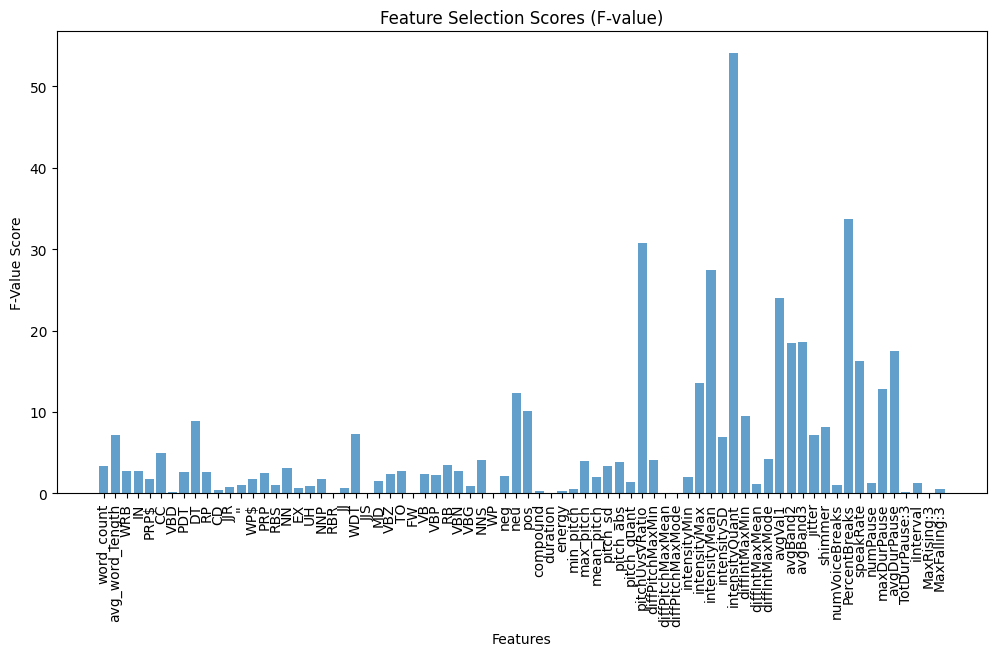

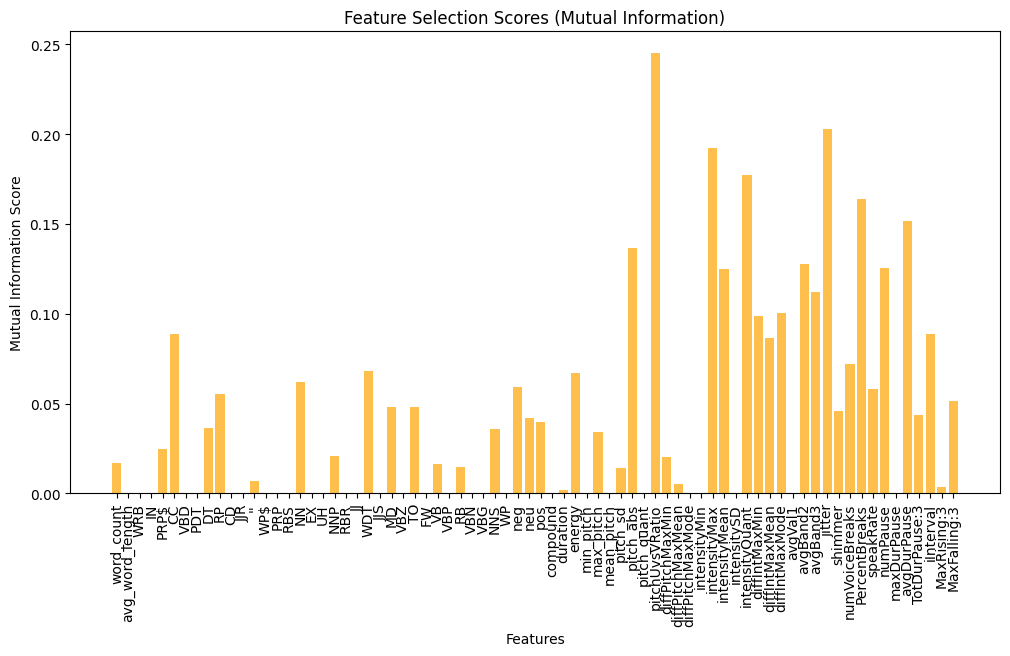

In [103]:
# F-value scores
f_scores = selector.scores_

# Visualize F-value scores
plt.figure(figsize=(12, 6))
plt.bar(semantic_multimodal[include_columns].columns, f_scores, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-Value Score')
plt.title('Feature Selection Scores (F-value)')
plt.show()

# Mutual Information Scores (Optional)
mi_scores = mi_selector.scores_
plt.figure(figsize=(12, 6))
plt.bar(semantic_multimodal[include_columns].columns, mi_scores, alpha=0.7, color='orange')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Feature Selection Scores (Mutual Information)')
plt.show()


In [104]:
# Intersection of selected features
intersection_features = set(selected_features).intersection(mi_selected_features)
print("Common features:", list(intersection_features))


Common features: ['avgBand2', 'intensityMax', 'pitchUvsVRatio', 'WDT', 'avgBand3', 'intensityMean', 'PercentBreaks', 'intensityQuant', 'diffIntMaxMin', 'jitter', 'avgDurPause']


In [105]:
# Union of selected features
union_features = set(selected_features).union(mi_selected_features)
print("Hybrid feature set:", list(union_features))


Hybrid feature set: ['iInterval', 'energy', 'diffIntMaxMean', 'NN', 'WDT', 'avgVal1', 'CC', 'PercentBreaks', 'intensityQuant', 'neu', 'maxDurPause', 'numVoiceBreaks', 'DT', 'pitch_abs', 'avgDurPause', 'numPause', 'diffIntMaxMode', 'pos', 'avgBand2', 'intensityMax', 'speakRate', 'pitchUvsVRatio', 'avg_word_length', 'shimmer', 'avgBand3', 'intensityMean', 'diffIntMaxMin', 'jitter', 'intensitySD']


In [106]:
feature_sets = {
    "FS1": semantic_multimodal[selected_features],
    "FS2": semantic_multimodal[mi_selected_features],
    "FS3": semantic_multimodal[list(intersection_features)],
    "FS4": semantic_multimodal[list(union_features)],
}


In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

# Placeholder for results
results = {}

# Assuming `feature_sets` is a dictionary where keys are feature set names and values are DataFrames
for feature_set_name, features in feature_sets.items():
    results[feature_set_name] = {'Pearson_r_Overall': [], 'RE_Overall': []}



    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(semantic_multimodal, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_overall = train_set['Overall']
        X_val = val_set[features.columns]
        y_val_overall = val_set['Overall']

        # Train Random Forest model on training data
        rf = RandomForestRegressor()
        rf.fit(X_train, y_train_overall)

        # Validate the model on the validation set
        y_pred_overall = rf.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'Overall'
        r_overall, _ = pearsonr(y_val_overall, y_pred_overall)
        re_overall = np.mean(np.abs((y_val_overall - y_pred_overall) / y_val_overall))

        # Store fold results
        results[feature_set_name]['Pearson_r_Overall'].append(r_overall)
        results[feature_set_name]['RE_Overall'].append(re_overall)

    # Average metrics over all folds
    results[feature_set_name]['Mean_Pearson_r_Overall'] = np.mean(results[feature_set_name]['Pearson_r_Overall'])
    results[feature_set_name]['Mean_RE_Overall'] = np.mean(results[feature_set_name]['RE_Overall'])

# Print results
for feature_set, metrics in results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (Overall): {metrics['Mean_Pearson_r_Overall']}")
    print(f"Mean Relative Error (Overall): {metrics['Mean_RE_Overall']}")
    print()

Feature Set: FS1
Mean Pearson r (Overall): 0.485783365768782
Mean Relative Error (Overall): 0.08630458108662256

Feature Set: FS2
Mean Pearson r (Overall): 0.5099570279284462
Mean Relative Error (Overall): 0.08739290053468454

Feature Set: FS3
Mean Pearson r (Overall): 0.46537691485676325
Mean Relative Error (Overall): 0.0936031808403788

Feature Set: FS4
Mean Pearson r (Overall): 0.5330268812346044
Mean Relative Error (Overall): 0.08326792369828187



In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

# Placeholder for results
results = {}

# Assuming `feature_sets` is a dictionary where keys are feature set names and values are DataFrames
for feature_set_name, features in feature_sets.items():
    results[feature_set_name] = {'Pearson_r_excited': [], 'RE_excited': []}



    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(semantic_multimodal, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_excited = train_set['Excited']
        X_val = val_set[features.columns]
        y_val_excited = val_set['Excited']

        # Train Random Forest model on training data
        rf = RandomForestRegressor()
        rf.fit(X_train, y_train_excited)

        # Validate the model on the validation set
        y_pred_excited = rf.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'excited'
        r_excited, _ = pearsonr(y_val_excited, y_pred_excited)
        re_excited = np.mean(np.abs((y_val_excited - y_pred_excited) / y_val_excited))

        # Store fold results
        results[feature_set_name]['Pearson_r_excited'].append(r_excited)
        results[feature_set_name]['RE_excited'].append(re_excited)

    # Average metrics over all folds
    results[feature_set_name]['Mean_Pearson_r_excited'] = np.mean(results[feature_set_name]['Pearson_r_excited'])
    results[feature_set_name]['Mean_RE_excited'] = np.mean(results[feature_set_name]['RE_excited'])

# Print results
for feature_set, metrics in results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (excited): {metrics['Mean_Pearson_r_excited']}")
    print(f"Mean Relative Error (excited): {metrics['Mean_RE_excited']}")
    print()

Feature Set: FS1
Mean Pearson r (excited): 0.6052571893784242
Mean Relative Error (excited): 0.10818440138554215

Feature Set: FS2
Mean Pearson r (excited): 0.6372576424742445
Mean Relative Error (excited): 0.10481454137296571

Feature Set: FS3
Mean Pearson r (excited): 0.6095980939650099
Mean Relative Error (excited): 0.10870548208403182

Feature Set: FS4
Mean Pearson r (excited): 0.6174024897217838
Mean Relative Error (excited): 0.10643654312491102



In [76]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Placeholder for results
bagging_results = {}

for feature_set_name, features in feature_sets.items():
    bagging_results[feature_set_name] = {'Pearson_r_Overall': [], 'RE_Overall': []}

    X = features
    y_overall = scores_data['Overall']

    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(semantic_multimodal, fold,test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_overall = train_set['Overall']
        X_val = val_set[features.columns]
        y_val_overall = val_set['Overall']

        # Train Bagging Regressor
        bagging_model = BaggingRegressor( n_estimators=50, random_state=42)
        bagging_model.fit(X_train, y_train_overall)

        # Validate the model on the validation set
        y_pred_overall = bagging_model.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'Overall'
        r_overall, _ = pearsonr(y_val_overall, y_pred_overall)
        re_overall = np.mean(np.abs((y_val_overall - y_pred_overall) / y_val_overall))

        # Store fold results
        bagging_results[feature_set_name]['Pearson_r_Overall'].append(r_overall)
        bagging_results[feature_set_name]['RE_Overall'].append(re_overall)

    # Average metrics over all folds
    bagging_results[feature_set_name]['Mean_Pearson_r_Overall'] = np.mean(bagging_results[feature_set_name]['Pearson_r_Overall'])
    bagging_results[feature_set_name]['Mean_RE_Overall'] = np.mean(bagging_results[feature_set_name]['RE_Overall'])

# Print Bagging results
print("\nBagging Results:")
for feature_set, metrics in bagging_results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (Overall): {metrics['Mean_Pearson_r_Overall']}")
    print(f"Mean Relative Error (Overall): {metrics['Mean_RE_Overall']}")
    print()



Bagging Results:
Feature Set: FS1
Mean Pearson r (Overall): 0.4865511311010079
Mean Relative Error (Overall): 0.09103252648367047

Feature Set: FS2
Mean Pearson r (Overall): 0.5130112043502991
Mean Relative Error (Overall): 0.0870575391859685

Feature Set: FS3
Mean Pearson r (Overall): 0.49193776407365836
Mean Relative Error (Overall): 0.0905846440305075

Feature Set: FS4
Mean Pearson r (Overall): 0.5019218910865201
Mean Relative Error (Overall): 0.08932960514633834



In [110]:
from sklearn.ensemble import AdaBoostRegressor

# Placeholder for results
boosting_results = {}

for feature_set_name, features in feature_sets.items():
    boosting_results[feature_set_name] = {'Pearson_r_excited': [], 'RE_excited': []}

    X = features
    y_excited = scores_data['Excited']

    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(semantic_multimodal, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_excited = train_set['Excited']
        X_val = val_set[features.columns]
        y_val_excited = val_set['Excited']

        # Train AdaBoost Regressor with Decision Trees
        adaboost_model = AdaBoostRegressor( n_estimators=50, random_state=42)
        adaboost_model.fit(X_train, y_train_excited)

        # Validate the model on the validation set
        y_pred_excited = adaboost_model.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'excited'
        r_excited, _ = pearsonr(y_val_excited, y_pred_excited)
        re_excited = np.mean(np.abs((y_val_excited - y_pred_excited) / y_val_excited))

        # Store fold results
        boosting_results[feature_set_name]['Pearson_r_excited'].append(r_excited)
        boosting_results[feature_set_name]['RE_excited'].append(re_excited)

    # Average metrics over all folds
    boosting_results[feature_set_name]['Mean_Pearson_r_excited'] = np.mean(boosting_results[feature_set_name]['Pearson_r_excited'])
    boosting_results[feature_set_name]['Mean_RE_excited'] = np.mean(boosting_results[feature_set_name]['RE_excited'])

# Print Boosting results
print("\nBoosting Results:")
for feature_set, metrics in boosting_results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (excited): {metrics['Mean_Pearson_r_excited']}")
    print(f"Mean Relative Error (excited): {metrics['Mean_RE_excited']}")
    print()



Boosting Results:
Feature Set: FS1
Mean Pearson r (excited): 0.5928750559300711
Mean Relative Error (excited): 0.10876186091223068

Feature Set: FS2
Mean Pearson r (excited): 0.6422219180041469
Mean Relative Error (excited): 0.10250854262417541

Feature Set: FS3
Mean Pearson r (excited): 0.5934200062280623
Mean Relative Error (excited): 0.10760151772403984

Feature Set: FS4
Mean Pearson r (excited): 0.6157557726088709
Mean Relative Error (excited): 0.10440241719342333



In [78]:
from xgboost import XGBRegressor

# Placeholder for results
boosting_results = {}

for feature_set_name, features in feature_sets.items():
    boosting_results[feature_set_name] = {'Pearson_r_Overall': [], 'RE_Overall': []}

    X = features
    y_overall = scores_data['Overall']

    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(semantic_multimodal, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_overall = train_set['Overall']
        X_val = val_set[features.columns]
        y_val_overall = val_set['Overall']

        # Train AdaBoost Regressor with Decision Trees
        xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
        xgb_model.fit(X_train, y_train_overall)

        # Validate the model on the validation set
        y_pred_overall = xgb_model.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'Overall'
        r_overall, _ = pearsonr(y_val_overall, y_pred_overall)
        re_overall = np.mean(np.abs((y_val_overall - y_pred_overall) / y_val_overall))

        # Store fold results
        boosting_results[feature_set_name]['Pearson_r_Overall'].append(r_overall)
        boosting_results[feature_set_name]['RE_Overall'].append(re_overall)

    # Average metrics over all folds
    boosting_results[feature_set_name]['Mean_Pearson_r_Overall'] = np.mean(boosting_results[feature_set_name]['Pearson_r_Overall'])
    boosting_results[feature_set_name]['Mean_RE_Overall'] = np.mean(boosting_results[feature_set_name]['RE_Overall'])

# Print Boosting results
print("\nBoosting Results:")
for feature_set, metrics in boosting_results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (Overall): {metrics['Mean_Pearson_r_Overall']}")
    print(f"Mean Relative Error (Overall): {metrics['Mean_RE_Overall']}")
    print()



Boosting Results:
Feature Set: FS1
Mean Pearson r (Overall): 0.44150795377686
Mean Relative Error (Overall): 0.09518299632034666

Feature Set: FS2
Mean Pearson r (Overall): 0.4120429949543107
Mean Relative Error (Overall): 0.09194344335042812

Feature Set: FS3
Mean Pearson r (Overall): 0.40599526851947526
Mean Relative Error (Overall): 0.09315559987805387

Feature Set: FS4
Mean Pearson r (Overall): 0.4588900284092416
Mean Relative Error (Overall): 0.09351098032116291



In [ ]:
best_features = list(feature_sets['FS4'].columns)

In [168]:
# Combine train and validation sets for final training
X_final_train = pd.concat([train_set[best_features], val_set[best_features]])
y_final_train_overall = pd.concat([train_set['Overall'], val_set['Overall']])

# Train model on the combined training set
adaboost_model = AdaBoostRegressor( n_estimators=50, random_state=42)
adaboost_model.fit(X_final_train, y_final_train_overall)

# Evaluate on the test set
X_test = test_set[best_features]
y_test_overall = test_set['Overall']
y_test_pred_overall = adaboost_model.predict(X_test)

# Final metrics
r_test, _ = pearsonr(y_test_overall, y_test_pred_overall)
re_test = np.mean(np.abs((y_test_overall - y_test_pred_overall) / y_test_overall))

print(f"Final Test Pearson r (Overall): {r_test}")
print(f"Final Test Relative Error (Overall): {re_test}")


Final Test Pearson r (Overall): 0.014176580281603013
Final Test Relative Error (Overall): 0.08794147398423564


In [164]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler

include_columns = word_count_scores.columns.tolist()
include_columns.remove('Participant')
include_columns.remove('Overall')
include_columns.remove('Excited')
# Scale features
scaler = StandardScaler()
semantic_features_scaled = scaler.fit_transform(word_count_scores[include_columns])

# Using SelectKBest with f_regression for scoring
m = 50
selector = SelectKBest(score_func=f_regression, k=m)
X_selected = selector.fit_transform(semantic_features_scaled, word_count_scores['Overall'])

# Get selected feature names
selected_features = word_count_scores[include_columns].columns[selector.get_support()]
print("Top m features (F-value):", selected_features.tolist())

Top m features (F-value): ['academic', 'accept', 'agreeable', 'america', 'bit', 'born', 'brain', 'candidates', 'chemical', 'city', 'committee', 'companies', 'consulting', 'dinner', 'elements', 'engaging', 'event', 'excites', 'feedback', 'fell', 'happened', 'hired', 'honestly', 'kind', 'like', 'little', 'lot', 'member', 'mentioned', 'newspaper', 'option', 'participate', 'person', 'personality', 'player', 'procrastinate', 'program', 'range', 'section', 'seven', 'smarter', 'sorority', 'speaking', 'taking', 'team', 'think', 'timeline', 'trained', 'try', 'weaknesses']


In [165]:
# mutual information for regression scoring
mi_selector = SelectKBest(score_func=mutual_info_regression, k=m)
X_mi_selected = mi_selector.fit_transform(semantic_features_scaled, word_count_scores['Overall'])

# Get selected feature names
mi_selected_features = word_count_scores[include_columns].columns[mi_selector.get_support()]
print("Top m features (Mutual Info):", mi_selected_features.tolist())


Top m features (Mutual Info): ['ahead', 'bit', 'cause', 'class', 'come', 'completely', 'concerns', 'conflict', 'decided', 'doing', 'dorm', 'end', 'enjoy', 'example', 'feel', 'focus', 'getting', 'girls', 'great', 'guess', 'handle', 'hmm', 'issues', 'just', 'kind', 'lab', 'leader', 'learning', 'members', 'minoring', 'mit', 'organizations', 'overcome', 'personality', 'player', 'product', 'pulling', 'reason', 'recent', 'science', 'situations', 'team', 'thank', 'thing', 'time', 'uh', 've', 'want', 'weight', 'yeah']


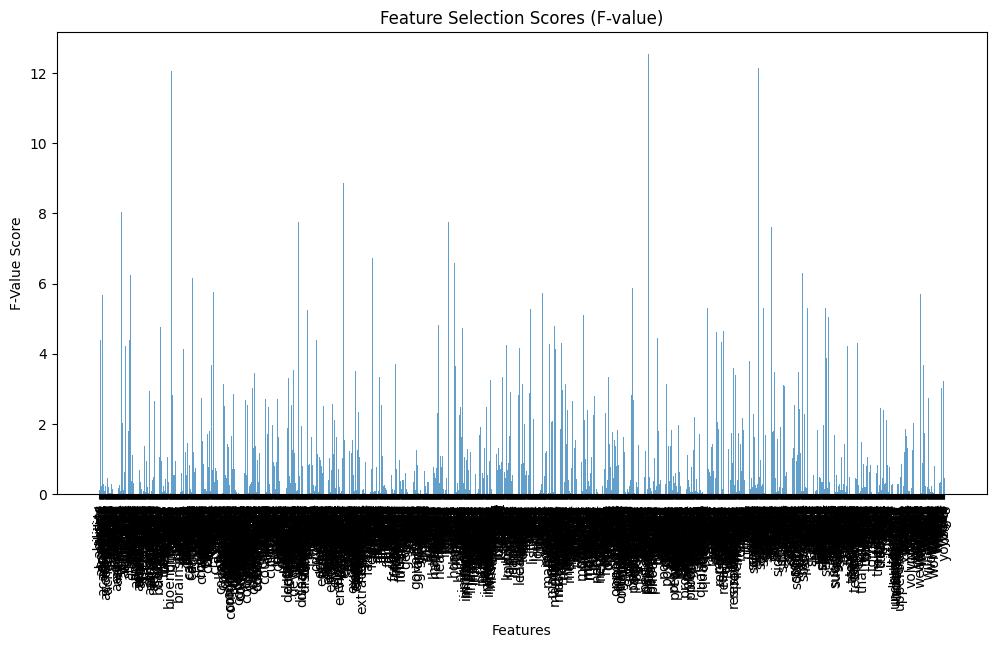

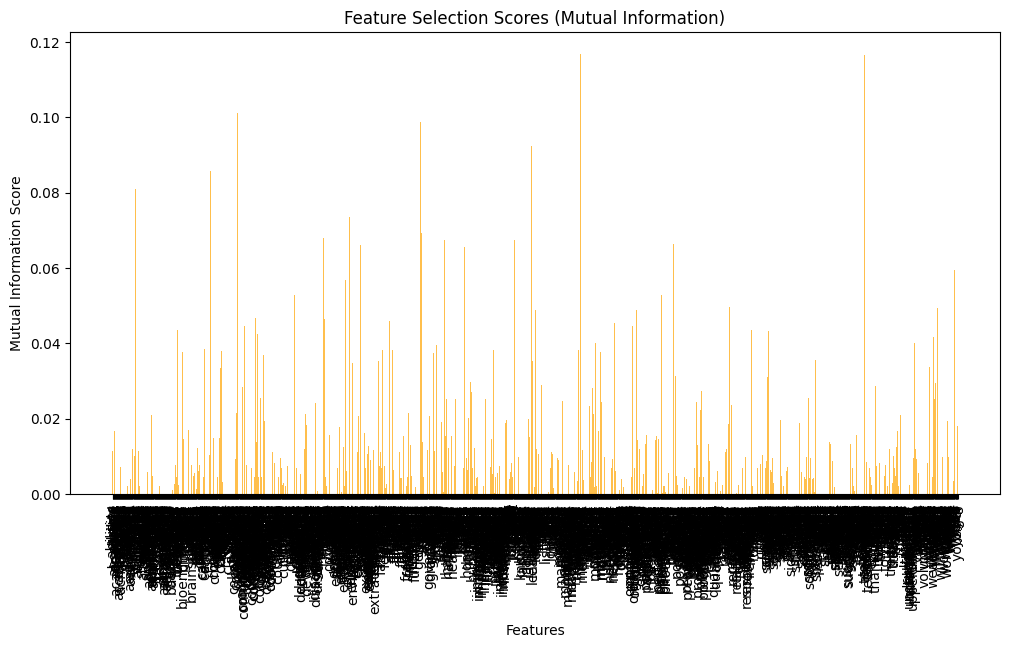

In [115]:
# F-value scores
f_scores = selector.scores_

# Visualize F-value scores
plt.figure(figsize=(12, 6))
plt.bar(word_count_scores[include_columns].columns, f_scores, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-Value Score')
plt.title('Feature Selection Scores (F-value)')
plt.show()

# Mutual Information Scores (Optional)
mi_scores = mi_selector.scores_
plt.figure(figsize=(12, 6))
plt.bar(word_count_scores[include_columns].columns, mi_scores, alpha=0.7, color='orange')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Feature Selection Scores (Mutual Information)')
plt.show()


In [166]:
# Intersection of selected features
intersection_features = set(selected_features).intersection(mi_selected_features)
print("Common features:", list(intersection_features))


Common features: ['personality', 'team', 'player', 'kind', 'bit']


In [167]:
# Union of selected features
union_features = set(selected_features).union(mi_selected_features)
print("Hybrid feature set:", list(union_features))


Hybrid feature set: ['situations', 'little', 'completely', 'born', 'doing', 'program', 'come', 'cause', 'bit', 'handle', 'engaging', 'option', 'conflict', 'weight', 'time', 'dorm', 'agreeable', 'recent', 'lab', 'try', 'chemical', 'girls', 'guess', 'organizations', 've', 'brain', 'happened', 'seven', 'trained', 'yeah', 'player', 'range', 'elements', 'product', 'person', 'dinner', 'section', 'thank', 'america', 'participate', 'academic', 'fell', 'taking', 'science', 'thing', 'learning', 'lot', 'focus', 'hmm', 'weaknesses', 'ahead', 'timeline', 'concerns', 'consulting', 'want', 'candidates', 'sorority', 'members', 'enjoy', 'like', 'great', 'uh', 'hired', 'example', 'leader', 'accept', 'issues', 'getting', 'think', 'speaking', 'city', 'member', 'smarter', 'mit', 'companies', 'feel', 'newspaper', 'minoring', 'overcome', 'event', 'excites', 'reason', 'pulling', 'honestly', 'mentioned', 'committee', 'just', 'feedback', 'team', 'kind', 'decided', 'personality', 'class', 'end', 'procrastinate']

In [168]:
feature_sets = {
    "FS1": word_count_scores[selected_features],
    "FS2": word_count_scores[mi_selected_features],
    "FS3": word_count_scores[list(intersection_features)],
    "FS4": word_count_scores[list(union_features)],
}


In [152]:
word_count_scores['Participant'] = transcript_prosodic['Participant']

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

# Placeholder for results
results = {}

# Assuming `feature_sets` is a dictionary where keys are feature set names and values are DataFrames
for feature_set_name, features in feature_sets.items():
    results[feature_set_name] = {'Pearson_r_excited': [], 'RE_excited': []}



    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(word_count_scores, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_excited = train_set['Excited']
        X_val = val_set[features.columns]
        y_val_excited = val_set['Excited']

        # Train Random Forest model on training data
        rf = RandomForestRegressor()
        rf.fit(X_train, y_train_excited)

        # Validate the model on the validation set
        y_pred_excited = rf.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'excited'
        r_excited, _ = pearsonr(y_val_excited, y_pred_excited)
        re_excited = np.mean(np.abs((y_val_excited - y_pred_excited) / y_val_excited))

        # Store fold results
        results[feature_set_name]['Pearson_r_excited'].append(r_excited)
        results[feature_set_name]['RE_excited'].append(re_excited)

    # Average metrics over all folds
    results[feature_set_name]['Mean_Pearson_r_excited'] = np.mean(results[feature_set_name]['Pearson_r_excited'])
    results[feature_set_name]['Mean_RE_excited'] = np.mean(results[feature_set_name]['RE_excited'])

# Print results
for feature_set, metrics in results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (excited): {metrics['Mean_Pearson_r_excited']}")
    print(f"Mean Relative Error (excited): {metrics['Mean_RE_excited']}")
    print()

Feature Set: FS1
Mean Pearson r (excited): 0.29117557678452205
Mean Relative Error (excited): 0.14209699208537313

Feature Set: FS2
Mean Pearson r (excited): 0.25983662203782526
Mean Relative Error (excited): 0.1405461587011681

Feature Set: FS3
Mean Pearson r (excited): 0.01874993583533635
Mean Relative Error (excited): 0.16678135962469856

Feature Set: FS4
Mean Pearson r (excited): 0.3604755963592648
Mean Relative Error (excited): 0.13510771966468074



In [153]:
word_count_prosodic = pd.merge(word_count_scores, prosodic_grouped, on='Participant')

In [154]:
word_count_prosodic.shape

(138, 1689)

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

# Placeholder for results
results = {}

# Assuming `feature_sets` is a dictionary where keys are feature set names and values are DataFrames
for feature_set_name, features in feature_sets.items():
    results[feature_set_name] = {'Pearson_r_excited': [], 'RE_excited': []}



    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(word_count_prosodic, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_excited = train_set['Excited']
        X_val = val_set[features.columns]
        y_val_excited = val_set['Excited']

        # Train Random Forest model on training data
        rf = RandomForestRegressor()
        rf.fit(X_train, y_train_excited)

        # Validate the model on the validation set
        y_pred_excited = rf.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'excited'
        r_excited, _ = pearsonr(y_val_excited, y_pred_excited)
        re_excited = np.mean(np.abs((y_val_excited - y_pred_excited) / y_val_excited))

        # Store fold results
        results[feature_set_name]['Pearson_r_excited'].append(r_excited)
        results[feature_set_name]['RE_excited'].append(re_excited)

    # Average metrics over all folds
    results[feature_set_name]['Mean_Pearson_r_excited'] = np.mean(results[feature_set_name]['Pearson_r_excited'])
    results[feature_set_name]['Mean_RE_excited'] = np.mean(results[feature_set_name]['RE_excited'])

# Print results
for feature_set, metrics in results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (excited): {metrics['Mean_Pearson_r_excited']}")
    print(f"Mean Relative Error (excited): {metrics['Mean_RE_excited']}")
    print()

Feature Set: FS1
Mean Pearson r (excited): 0.6042373940157206
Mean Relative Error (excited): 0.10865417290423676

Feature Set: FS2
Mean Pearson r (excited): 0.6469595572127353
Mean Relative Error (excited): 0.10331690176560533

Feature Set: FS3
Mean Pearson r (excited): 0.6178810001890032
Mean Relative Error (excited): 0.10813029379010246

Feature Set: FS4
Mean Pearson r (excited): 0.6402386922254641
Mean Relative Error (excited): 0.10402780936090035



In [173]:
from sklearn.neural_network import MLPRegressor

# Placeholder for results
results = {}

# Assuming `feature_sets` is a dictionary where keys are feature set names and values are DataFrames
for feature_set_name, features in feature_sets.items():
    results[feature_set_name] = {'Pearson_r_excited': [], 'RE_excited': []}



    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(word_count_prosodic, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_excited = train_set['Excited']
        X_val = val_set[features.columns]
        y_val_excited = val_set['Excited']

        # Train Random Forest model on training data
        mlp = MLPRegressor(hidden_layer_sizes=(512, 128, 64,32), max_iter=1000, random_state=42)
        mlp.fit(X_train, y_train_excited)

        # Validate the model on the validation set
        y_pred_excited = mlp.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'excited'
        r_excited, _ = pearsonr(y_val_excited, y_pred_excited)
        re_excited = np.mean(np.abs((y_val_excited - y_pred_excited) / y_val_excited))

        # Store fold results
        results[feature_set_name]['Pearson_r_excited'].append(r_excited)
        results[feature_set_name]['RE_excited'].append(re_excited)

    # Average metrics over all folds
    results[feature_set_name]['Mean_Pearson_r_excited'] = np.mean(results[feature_set_name]['Pearson_r_excited'])
    results[feature_set_name]['Mean_RE_excited'] = np.mean(results[feature_set_name]['RE_excited'])

# Print results
for feature_set, metrics in results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (excited): {metrics['Mean_Pearson_r_excited']}")
    print(f"Mean Relative Error (excited): {metrics['Mean_RE_excited']}")
    print()


mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train_excited)

# Validate the model on the validation set
y_pred_excited = mlp.predict(X_val)

Feature Set: FS1
Mean Pearson r (excited): 0.13330621412825144
Mean Relative Error (excited): 0.24971200085535078

Feature Set: FS2
Mean Pearson r (excited): 0.33216186686540106
Mean Relative Error (excited): 0.23851660855176213

Feature Set: FS3
Mean Pearson r (excited): 0.12149342864850243
Mean Relative Error (excited): 0.18788511881227277

Feature Set: FS4
Mean Pearson r (excited): 0.36564525075999427
Mean Relative Error (excited): 0.2002656493323237



In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

# Placeholder for results
results = {}

# Assuming `feature_sets` is a dictionary where keys are feature set names and values are DataFrames
for feature_set_name, features in feature_sets.items():
    results[feature_set_name] = {'Pearson_r_overall': [], 'RE_overall': []}



    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(word_count_prosodic, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_overall = train_set['Overall']
        X_val = val_set[features.columns]
        y_val_overall = val_set['Overall']

        # Train Random Forest model on training data
        rf = RandomForestRegressor()
        rf.fit(X_train, y_train_overall)

        # Validate the model on the validation set
        y_pred_overall = rf.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'overall'
        r_overall, _ = pearsonr(y_val_overall, y_pred_overall)
        re_overall = np.mean(np.abs((y_val_overall - y_pred_overall) / y_val_overall))

        # Store fold results
        results[feature_set_name]['Pearson_r_overall'].append(r_overall)
        results[feature_set_name]['RE_overall'].append(re_overall)

    # Average metrics over all folds
    results[feature_set_name]['Mean_Pearson_r_overall'] = np.mean(results[feature_set_name]['Pearson_r_overall'])
    results[feature_set_name]['Mean_RE_overall'] = np.mean(results[feature_set_name]['RE_overall'])

# Print results
for feature_set, metrics in results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (overall): {metrics['Mean_Pearson_r_overall']}")
    print(f"Mean Relative Error (overall): {metrics['Mean_RE_overall']}")
    print()

Feature Set: FS1
Mean Pearson r (overall): 0.5098192498867592
Mean Relative Error (overall): 0.08517326033422937

Feature Set: FS2
Mean Pearson r (overall): 0.5430571951782467
Mean Relative Error (overall): 0.08194335447967402

Feature Set: FS3
Mean Pearson r (overall): 0.4625864742353249
Mean Relative Error (overall): 0.09081091471553565

Feature Set: FS4
Mean Pearson r (overall): 0.51187856076997
Mean Relative Error (overall): 0.084130913892542



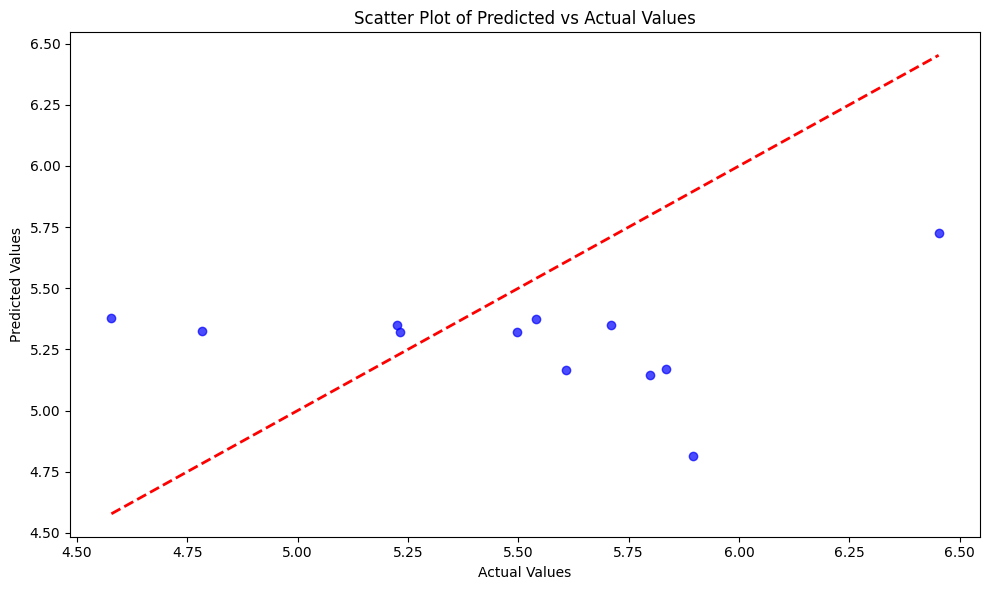

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_overall, y_test_pred_overall, alpha=0.7, color='blue')
plt.plot([min(y_test_overall), max(y_test_overall)], [min(y_test_overall), max(y_test_overall)], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.tight_layout()
plt.show()

## Predicting Excited (Multimodal)

In [138]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler

include_columns = semantic_multimodal.columns.tolist()
include_columns.remove('Participant')
include_columns.remove('Overall')
include_columns.remove('Excited')
# Scale features
scaler = StandardScaler()
semantic_features_scaled = scaler.fit_transform(semantic_multimodal[include_columns])

# Using SelectKBest with f_regression for scoring
m = 50
selector = SelectKBest(score_func=f_regression, k=m)
X_selected = selector.fit_transform(semantic_features_scaled, semantic_multimodal['Excited'])

# Get selected feature names
selected_features = semantic_multimodal[include_columns].columns[selector.get_support()]
print("Top m features (F-value):", selected_features.tolist())

Top m features (F-value): ['word_count', 'WRB', 'IN', 'PRP$', 'CC', 'VBD', 'DT', 'RP', "''", 'PRP', 'NN', 'EX', 'UH', 'NNP', 'JJ', 'WDT', 'MD', 'VBZ', 'TO', 'VB', 'VBP', 'RB', 'VBN', 'VBG', 'NNS', 'WP', 'compound', 'duration', 'max_pitch', 'mean_pitch', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'diffPitchMaxMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'avgVal1', 'avgBand2', 'avgBand3', 'jitter', 'shimmer', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause', 'TotDurPause:3', 'iInterval']


In [139]:
# mutual information for regression scoring
mi_selector = SelectKBest(score_func=mutual_info_regression, k=m)
X_mi_selected = mi_selector.fit_transform(semantic_features_scaled, semantic_multimodal['Excited'])

# Get selected feature names
mi_selected_features = semantic_multimodal[include_columns].columns[mi_selector.get_support()]
print("Top m features (Mutual Info):", mi_selected_features.tolist())


Top m features (Mutual Info): ['word_count', 'IN', 'PRP$', 'CC', 'PDT', 'DT', 'RP', 'JJR', 'PRP', 'RBS', 'NN', 'EX', 'RBR', 'JJ', 'WDT', 'MD', 'TO', 'VBP', 'RB', 'VBN', 'VBG', 'NNS', 'neu', 'pos', 'compound', 'duration', 'energy', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitchUvsVRatio', 'diffPitchMaxMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'avgVal1', 'avgBand2', 'avgBand3', 'jitter', 'shimmer', 'PercentBreaks', 'speakRate', 'numPause', 'maxDurPause', 'avgDurPause', 'TotDurPause:3', 'MaxFalling:3']


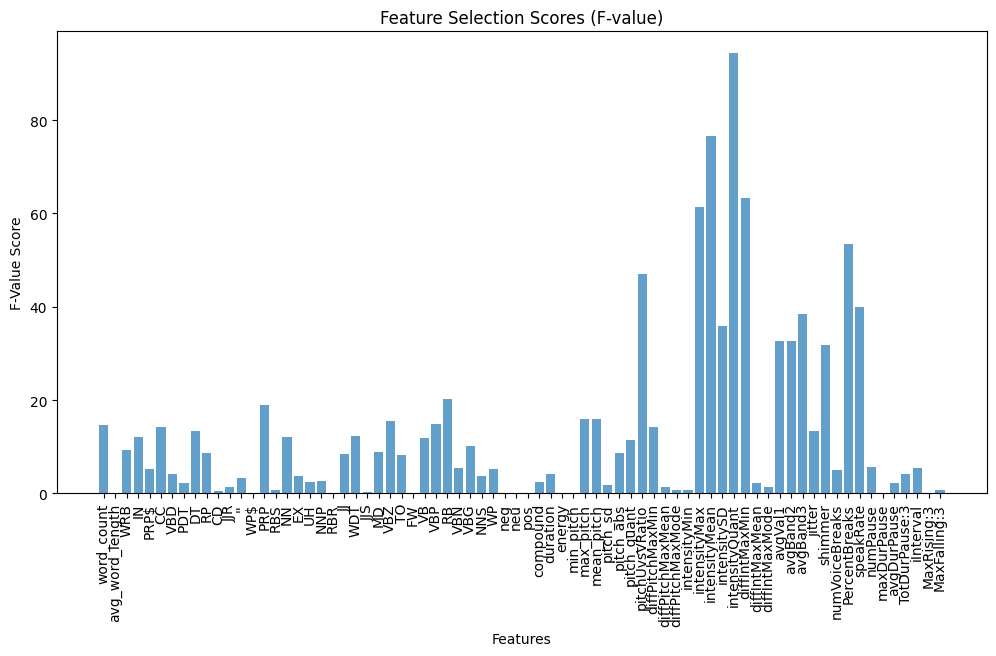

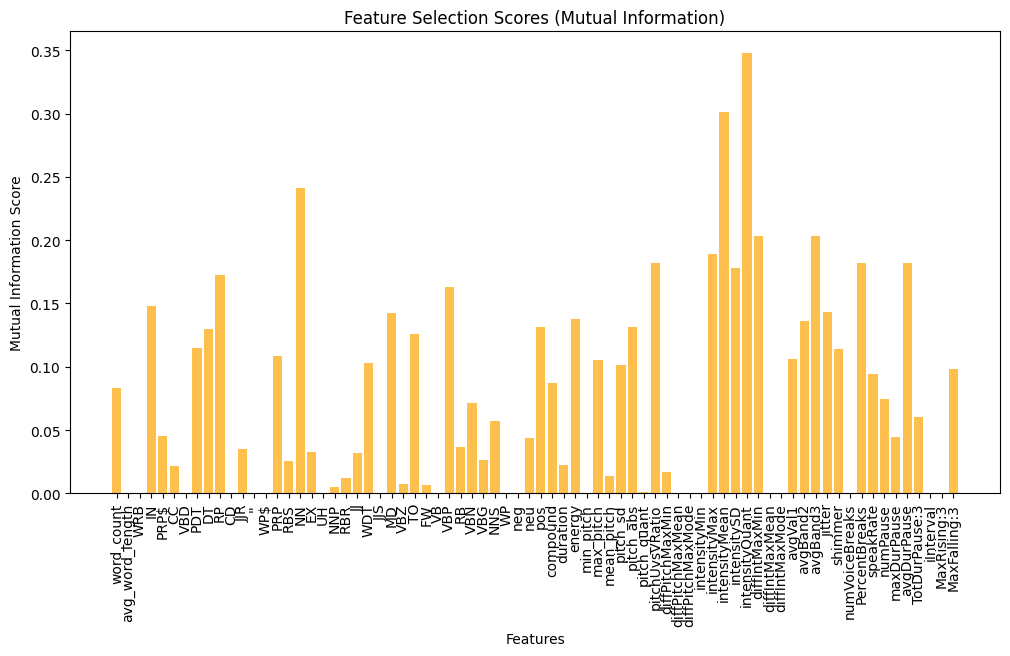

In [140]:
# F-value scores
f_scores = selector.scores_

# Visualize F-value scores
plt.figure(figsize=(12, 6))
plt.bar(semantic_multimodal[include_columns].columns, f_scores, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-Value Score')
plt.title('Feature Selection Scores (F-value)')
plt.show()

# Mutual Information Scores (Optional)
mi_scores = mi_selector.scores_
plt.figure(figsize=(12, 6))
plt.bar(semantic_multimodal[include_columns].columns, mi_scores, alpha=0.7, color='orange')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Feature Selection Scores (Mutual Information)')
plt.show()


In [141]:
# Intersection of selected features
intersection_features = set(selected_features).intersection(mi_selected_features)
print("Common features:", list(intersection_features))


Common features: ['IN', 'PRP$', 'CC', 'PercentBreaks', 'intensityQuant', 'word_count', 'RP', 'DT', 'pitch_abs', 'duration', 'speakRate', 'pitchUvsVRatio', 'max_pitch', 'shimmer', 'jitter', 'intensitySD', 'PRP', 'NN', 'EX', 'TotDurPause:3', 'mean_pitch', 'JJ', 'WDT', 'avgVal1', 'MD', 'TO', 'numPause', 'avgBand2', 'intensityMax', 'VBP', 'RB', 'VBN', 'VBG', 'NNS', 'avgBand3', 'diffPitchMaxMin', 'intensityMean', 'diffIntMaxMin', 'compound']


In [142]:
# Union of selected features
union_features = set(selected_features).union(mi_selected_features)
print("Hybrid feature set:", list(union_features))


Hybrid feature set: ['WRB', 'IN', 'PRP$', 'CC', 'VBD', 'PDT', 'PercentBreaks', 'intensityQuant', 'pitch_sd', 'word_count', 'numVoiceBreaks', 'RP', 'DT', 'pitch_abs', 'duration', 'pos', 'speakRate', 'pitchUvsVRatio', 'JJR', 'max_pitch', 'shimmer', "''", 'jitter', 'intensitySD', 'PRP', 'iInterval', 'energy', 'RBS', 'NN', 'EX', 'UH', 'NNP', 'TotDurPause:3', 'mean_pitch', 'JJ', 'WDT', 'avgVal1', 'RBR', 'MD', 'TO', 'VBZ', 'maxDurPause', 'VB', 'numPause', 'avgDurPause', 'avgBand2', 'intensityMax', 'VBP', 'RB', 'MaxFalling:3', 'VBN', 'VBG', 'pitch_quant', 'NNS', 'avgBand3', 'diffPitchMaxMin', 'intensityMean', 'diffIntMaxMin', 'neu', 'compound', 'WP']


In [143]:
feature_sets = {
    "FS1": semantic_multimodal[selected_features],
    "FS2": semantic_multimodal[mi_selected_features],
    "FS3": semantic_multimodal[list(intersection_features)],
    "FS4": semantic_multimodal[list(union_features)],
}


In [144]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

# Placeholder for results
results = {}

# Assuming `feature_sets` is a dictionary where keys are feature set names and values are DataFrames
for feature_set_name, features in feature_sets.items():
    results[feature_set_name] = {'Pearson_r_excited': [], 'RE_excited': []}



    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(semantic_multimodal, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_excited = train_set['Excited']
        X_val = val_set[features.columns]
        y_val_excited = val_set['Excited']

        # Train Random Forest model on training data
        rf = RandomForestRegressor()
        rf.fit(X_train, y_train_excited)

        # Validate the model on the validation set
        y_pred_excited = rf.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'excited'
        r_excited, _ = pearsonr(y_val_excited, y_pred_excited)
        re_excited = np.mean(np.abs((y_val_excited - y_pred_excited) / y_val_excited))

        # Store fold results
        results[feature_set_name]['Pearson_r_excited'].append(r_excited)
        results[feature_set_name]['RE_excited'].append(re_excited)

    # Average metrics over all folds
    results[feature_set_name]['Mean_Pearson_r_excited'] = np.mean(results[feature_set_name]['Pearson_r_excited'])
    results[feature_set_name]['Mean_RE_excited'] = np.mean(results[feature_set_name]['RE_excited'])

# Print results
for feature_set, metrics in results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (excited): {metrics['Mean_Pearson_r_excited']}")
    print(f"Mean Relative Error (excited): {metrics['Mean_RE_excited']}")
    print()

Feature Set: FS1
Mean Pearson r (excited): 0.6298704242384326
Mean Relative Error (excited): 0.10822249421904033

Feature Set: FS2
Mean Pearson r (excited): 0.61235780468614
Mean Relative Error (excited): 0.10822504542252406

Feature Set: FS3
Mean Pearson r (excited): 0.603751821174023
Mean Relative Error (excited): 0.10999832442043825

Feature Set: FS4
Mean Pearson r (excited): 0.61325756085926
Mean Relative Error (excited): 0.10889456071432262



In [145]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Placeholder for results
bagging_results = {}

for feature_set_name, features in feature_sets.items():
    bagging_results[feature_set_name] = {'Pearson_r_excited': [], 'RE_excited': []}

    X = features
    y_excited = scores_data['Excited']

    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(semantic_multimodal, fold,test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_excited = train_set['Excited']
        X_val = val_set[features.columns]
        y_val_excited = val_set['Excited']

        # Train Bagging Regressor
        bagging_model = BaggingRegressor( n_estimators=50, random_state=42)
        bagging_model.fit(X_train, y_train_excited)

        # Validate the model on the validation set
        y_pred_excited = bagging_model.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'excited'
        r_excited, _ = pearsonr(y_val_excited, y_pred_excited)
        re_excited = np.mean(np.abs((y_val_excited - y_pred_excited) / y_val_excited))

        # Store fold results
        bagging_results[feature_set_name]['Pearson_r_excited'].append(r_excited)
        bagging_results[feature_set_name]['RE_excited'].append(re_excited)

    # Average metrics over all folds
    bagging_results[feature_set_name]['Mean_Pearson_r_excited'] = np.mean(bagging_results[feature_set_name]['Pearson_r_excited'])
    bagging_results[feature_set_name]['Mean_RE_excited'] = np.mean(bagging_results[feature_set_name]['RE_excited'])

# Print Bagging results
print("\nBagging Results:")
for feature_set, metrics in bagging_results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (excited): {metrics['Mean_Pearson_r_excited']}")
    print(f"Mean Relative Error (excited): {metrics['Mean_RE_excited']}")
    print()



Bagging Results:
Feature Set: FS1
Mean Pearson r (excited): 0.5743112210792092
Mean Relative Error (excited): 0.11419918747314668

Feature Set: FS2
Mean Pearson r (excited): 0.6066691398226725
Mean Relative Error (excited): 0.10921661197597507

Feature Set: FS3
Mean Pearson r (excited): 0.5835170190660259
Mean Relative Error (excited): 0.11328340950410423

Feature Set: FS4
Mean Pearson r (excited): 0.603090222378509
Mean Relative Error (excited): 0.10958155523223892



In [87]:
from sklearn.ensemble import AdaBoostRegressor

# Placeholder for results
boosting_results = {}

for feature_set_name, features in feature_sets.items():
    boosting_results[feature_set_name] = {'Pearson_r_excited': [], 'RE_excited': []}

    X = features
    y_excited = scores_data['Excited']

    for fold in range(5):
        # Split data into train, validation, and test sets
        train_set, val_set, test_set = get_data_splits(semantic_multimodal, fold, test_set_participants, interview_folds)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_excited = train_set['Excited']
        X_val = val_set[features.columns]
        y_val_excited = val_set['Excited']

        # Train AdaBoost Regressor with Decision Trees
        adaboost_model = AdaBoostRegressor(random_state=42)
        adaboost_model.fit(X_train, y_train_excited)

        # Validate the model on the validation set
        y_pred_excited = adaboost_model.predict(X_val)

        # Pearson's r and Relative Error (RE) for 'excited'
        r_excited, _ = pearsonr(y_val_excited, y_pred_excited)
        re_excited = np.mean(np.abs((y_val_excited - y_pred_excited) / y_val_excited))

        # Store fold results
        boosting_results[feature_set_name]['Pearson_r_excited'].append(r_excited)
        boosting_results[feature_set_name]['RE_excited'].append(re_excited)

    # Average metrics over all folds
    boosting_results[feature_set_name]['Mean_Pearson_r_excited'] = np.mean(boosting_results[feature_set_name]['Pearson_r_excited'])
    boosting_results[feature_set_name]['Mean_RE_excited'] = np.mean(boosting_results[feature_set_name]['RE_excited'])

# Print Boosting results
print("\nBoosting Results:")
for feature_set, metrics in boosting_results.items():
    print(f"Feature Set: {feature_set}")
    print(f"Mean Pearson r (excited): {metrics['Mean_Pearson_r_excited']}")
    print(f"Mean Relative Error (excited): {metrics['Mean_RE_excited']}")
    print()



Boosting Results:
Feature Set: FS1
Mean Pearson r (excited): 0.5792275755638074
Mean Relative Error (excited): 0.12386937909705178

Feature Set: FS2
Mean Pearson r (excited): 0.5846921434806248
Mean Relative Error (excited): 0.12215802544312127

Feature Set: FS3
Mean Pearson r (excited): 0.6376223569600399
Mean Relative Error (excited): 0.11420051783044882

Feature Set: FS4
Mean Pearson r (excited): 0.5897040467458184
Mean Relative Error (excited): 0.12116397441491641



In [135]:
!pip install shap


In [174]:
import shap

# Create a SHAP explainer for Random Forest
explainer = shap.TreeExplainer(mlp)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP summary
shap.summary_plot(shap_values, X_train)


InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>

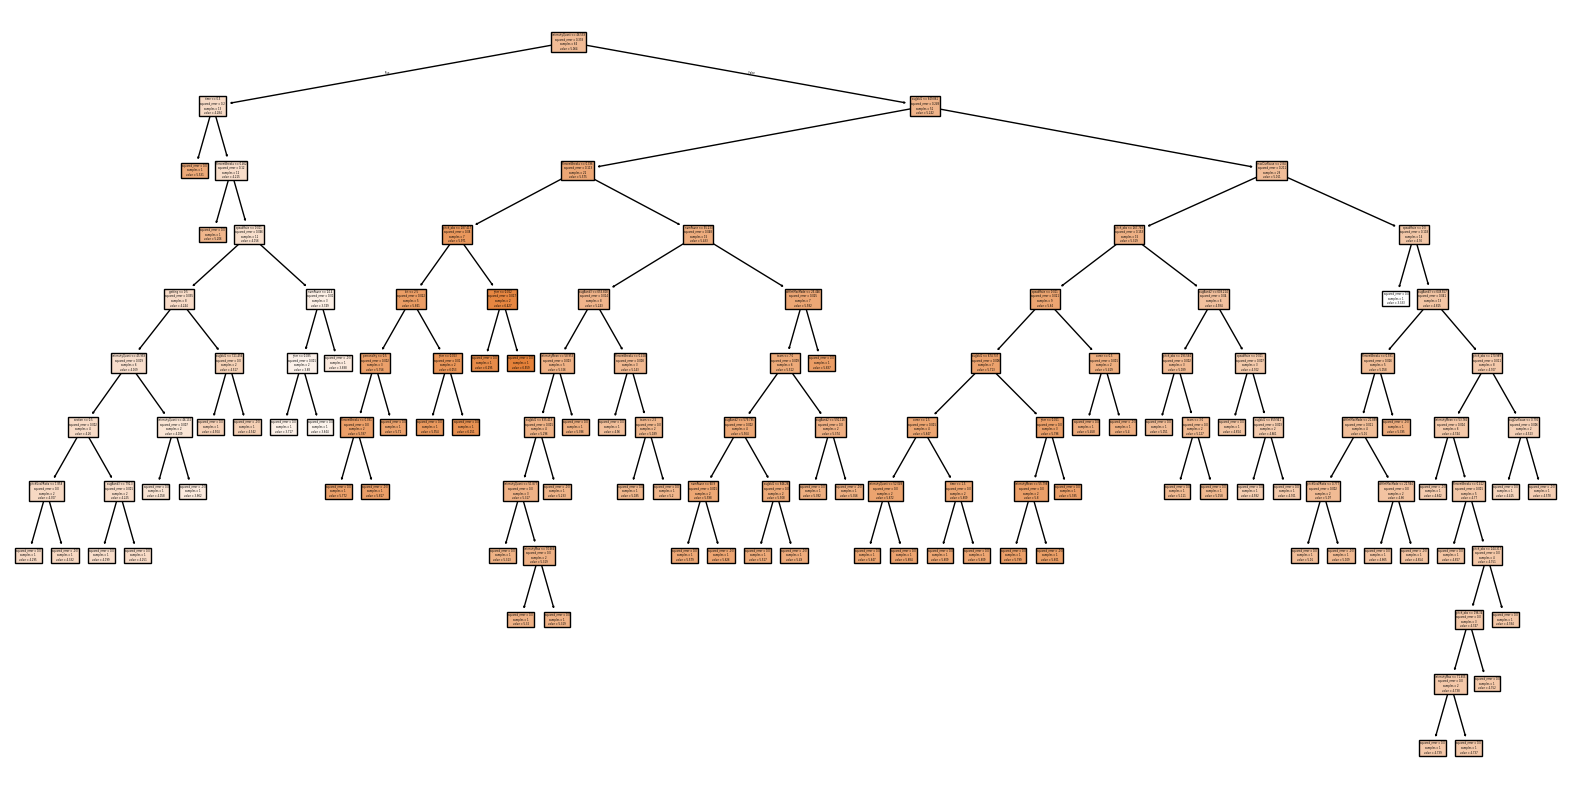

In [137]:
from sklearn.tree import plot_tree

# Visualize the first tree in the Random Forest
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], filled=True, feature_names=X_train.columns)
plt.show()


In [94]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b17e179af36ca35751644bb163a46ee3152bb86485a03a6412434d7c4141f42e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
best_features = list(feature_sets['FS4'].columns)

In [ ]:
# Combine train and validation sets for final training
X_final_train = pd.concat([train_set[best_features], val_set[best_features]])
y_final_train_overall = pd.concat([train_set['Overall'], val_set['Overall']])

# Train model on the combined training set
adaboost_model = AdaBoostRegressor( n_estimators=50, random_state=42)
adaboost_model.fit(X_final_train, y_final_train_overall)

# Evaluate on the test set
X_test = test_set[best_features]
y_test_overall = test_set['Overall']
y_test_pred_overall = adaboost_model.predict(X_test)

# Final metrics
r_test, _ = pearsonr(y_test_overall, y_test_pred_overall)
re_test = np.mean(np.abs((y_test_overall - y_test_pred_overall) / y_test_overall))

print(f"Final Test Pearson r (Overall): {r_test}")
print(f"Final Test Relative Error (Overall): {re_test}")


Final Test Pearson r (Overall): 0.014176580281603013
Final Test Relative Error (Overall): 0.08794147398423564


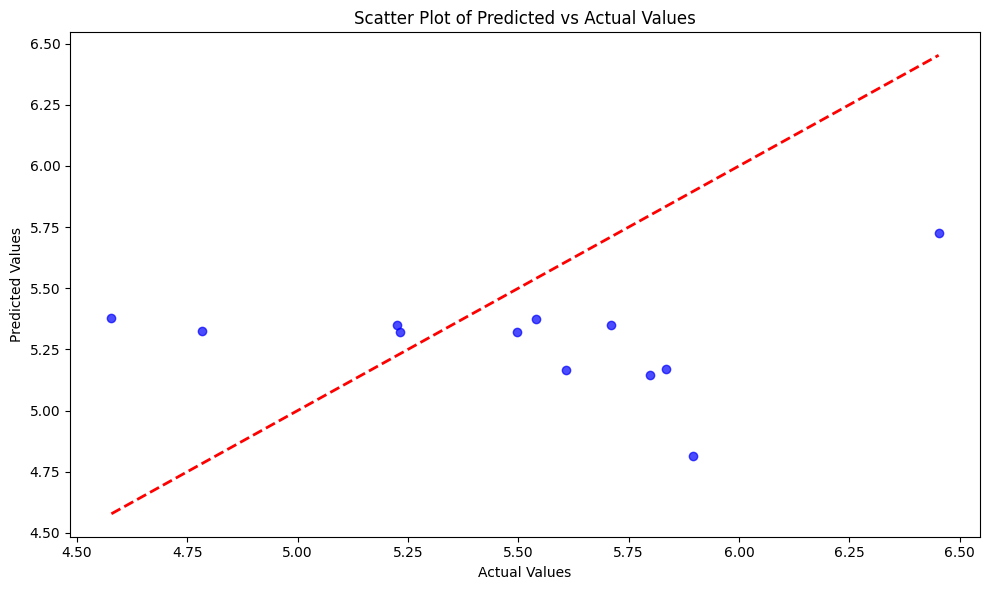

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_overall, y_test_pred_overall, alpha=0.7, color='blue')
plt.plot([min(y_test_overall), max(y_test_overall)], [min(y_test_overall), max(y_test_overall)], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.tight_layout()
plt.show()

In [180]:
advanced_features = pd.concat([advanced_features, scores_data], axis=1)
advanced_features.head()

,0,1,2,3,4,5,6,7,8,9,...,761,762,763,764,765,766,767,Participant,Overall,Excited
0,-0.080575,0.198660,0.904548,-0.291463,0.067924,0.083894,0.649144,0.082590,0.237247,-0.492095,...,-0.064166,-0.186102,0.152587,-0.044459,-0.307110,-0.035550,0.253304,p1,5.297316,5.043890
1,0.043937,0.216435,0.921454,-0.095000,0.221988,-0.351229,0.068515,0.394245,-0.044466,-0.293525,...,-0.123588,0.003367,-0.208671,-0.240479,-0.288032,0.107132,0.031473,p3,4.414892,5.601586
2,-0.119609,0.233089,0.215913,-0.192303,0.221290,-0.094351,-0.144540,0.311336,0.084931,-0.261623,...,-0.160361,-0.089782,-0.153039,-0.415738,-0.236491,0.263084,0.128140,p4,4.494494,4.261343
3,-0.007203,0.133300,0.540318,-0.269130,0.018763,-0.060051,0.313952,0.396858,0.061627,-0.258457,...,0.131291,-0.066832,0.083488,-0.479910,-0.287442,0.175348,0.193140,p5,5.457670,4.707062
4,-0.116869,-0.168345,0.489522,-0.442579,0.156626,-0.160259,-0.083622,0.324934,0.134086,-0.523135,...,0.142422,-0.116994,0.034482,-0.233010,-0.319211,0.313176,0.023816,p6,5.106512,4.648259


In [181]:
include_colmuns = advanced_features.columns.tolist()
include_colmuns.remove('Participant')
include_colmuns.remove('Overall')
include_colmuns.remove('Excited')
train_set, val_set, test_set = get_data_splits(advanced_features, fold,test_set_participants, interview_folds)

In [201]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr
import numpy as np


# Define the LSTM model function
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(512, input_shape=input_shape, return_sequences=True))  # LSTM layer with 512 units
    model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
    model.add(LSTM(128, return_sequences=False))  # Another LSTM layer with 128 units
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))  # Fully connected layer
    model.add(Dense(1))  # Output layer for regression task

    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Placeholder for results
results = []

# Loop through each fold
for fold in range(5):
    # Get train, validation, and test sets from get_data_splits
    train_set, val_set, test_set = get_data_splits(advanced_features, fold,test_set_participants, interview_folds)

    # Extract BERT embeddings and targets (Overall and Excited) for each set
    X_train = train_set[include_colmuns].values
    X_val = val_set[include_colmuns].values
    X_test = test_set[include_colmuns].values

    y_train_overall = train_set['Overall'].values
    y_val_overall = val_set['Overall'].values
    y_test_overall = test_set['Overall'].values

    y_train_excited = train_set['Excited'].values
    y_val_excited = val_set['Excited'].values
    y_test_excited = test_set['Excited'].values

    # Reshape the data to (samples, timesteps, features) for LSTM
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # (samples, 1, 768)
    x_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

    # Build and train the LSTM model
    lstm_model = build_lstm_model((X_train.shape[1], X_train.shape[2]))  # Input shape for LSTM
    lstm_model.fit(X_train, y_train_overall, epochs=5, batch_size=32, validation_data=(X_val, y_val_overall))

    # Predict and evaluate on the validation set
    y_pred_overall = lstm_model.predict(X_val)
    mae = mean_absolute_error(y_val_overall, y_pred_overall)


    # Store results for each fold
    results.append({
        'MAE': mae
    })

# Display the results for all folds
for i, result in enumerate(results):
    print(f"Fold {i+1}: MAE = {result['MAE']}")

# Compute average MAE and Pearson correlation across all folds
avg_mae = np.mean([result['MAE'] for result in results])
# avg_pearson_corr = np.mean([result['Pearson_r'] for result in results])

print(f"\nAverage MAE: {avg_mae}")
# print(f"Average Pearson Correlation: {avg_pearson_corr}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - loss: 23.8179 - val_loss: 15.3610
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 10.9549 - val_loss: 1.2678
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 1.0649 - val_loss: 2.9260
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 2.9975 - val_loss: 0.6613
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.5539 - val_loss: 1.7494


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - loss: 24.1816 - val_loss: 14.9281
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 11.7924 - val_loss: 0.8585
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.2426 - val_loss: 2.5556
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 2.7072 - val_loss: 0.4039
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.7559 - val_loss: 0.8238


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step - loss: 24.5882 - val_loss: 13.5521
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 11.4994 - val_loss: 0.7680
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 1.1760 - val_loss: 3.5175
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 2.6742 - val_loss: 0.6254
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.6588 - val_loss: 1.0883
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - loss: 24.2319 - val_loss: 12.0363
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.5946 - val_loss: 0.4288
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.4432 - val_loss: 3.3395
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2.6958 - val_loss: 0.3513
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7107 - val_loss: 0.9437
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - loss: 23.5564 - val_loss: 13.8505
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 11.0064 - val_loss: 0.5620
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 1.1311 - val_loss: 3.1710
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 2.3548 - val_loss: 0.4705
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.6792 - val_loss: 0.8614
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
Fold 1: MAE = 1.1423287720487718
Fold 2: MAE = 0.8175155890037746
Fold 3: MAE = 0.9151299425793973
Fold 4: MAE = 0.8316500892376455
Fold 5: MAE = 0.8175201052925111

Average MAE: 0.90482889963242


In [213]:
train_set, val_set, test_set = get_data_splits(advanced_features, fold,test_set_participants, interview_folds)

# Extract BERT embeddings and targets (Overall and Excited) for each set
X_train = train_set[include_colmuns].values
X_val = val_set[include_colmuns].values
X_test = test_set[include_colmuns].values

y_train_overall = train_set['Overall'].values
y_val_overall = val_set['Overall'].values
y_test_overall = test_set['Overall'].values

y_train_excited = train_set['Excited'].values
y_val_excited = val_set['Excited'].values
y_test_excited = test_set['Excited'].values

# Reshape the data to (samples, timesteps, features) for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # (samples, 1, 768)
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

# Build and train the LSTM model
lstm_model = build_lstm_model((X_train.shape[1], X_train.shape[2]))  # Input shape for LSTM
lstm_model.fit(X_train, y_train_overall, epochs=5, batch_size=32, validation_data=(X_val, y_val_overall))

y_pred_overall = lstm_model.predict(X_test)
mae = mean_absolute_error(y_test_overall, y_pred_overall)


print(f"Test MAE: {mae}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 275ms/step - loss: 25.0352 - val_loss: 17.9568
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 15.4374 - val_loss: 3.6618
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 3.1136 - val_loss: 2.2757
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 2.6481 - val_loss: 2.1769
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 1.5948 - val_loss: 0.3705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
Test MAE: 0.5999618635609538


,Participant,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3
0,p1,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,0.951904,...,86.40,0.432938,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474
1,p10,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,0.825242,...,149.40,0.411714,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450
2,p11,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,0.628611,...,120.80,0.367116,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714
3,p12,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,0.804380,...,92.20,0.397498,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378
4,p13,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,1.132642,...,96.25,0.490740,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,pp83,28.907788,0.003143,75.106137,375.449500,240.799891,47.024393,306.047489,238.655133,0.634296,...,56.00,0.353642,0.000600,23.60,1.668267,0.5334,12.09800,62.0,181.8062,196.4858
134,pp84,52.262092,0.008353,77.471544,393.760530,209.208918,28.918232,255.670407,206.123903,0.502713,...,109.00,0.318550,0.000328,43.80,2.421333,0.6678,29.90780,115.2,161.6076,199.9002
135,pp85,62.115933,0.007095,71.071074,367.137037,108.901779,33.320900,194.309486,98.183810,0.894414,...,199.40,0.476654,0.000321,65.00,1.902269,0.4726,30.98080,207.4,262.1438,260.6900
136,pp86,76.643092,0.010589,78.332326,353.811432,128.650234,33.885335,175.557862,117.174766,1.211922,...,149.80,0.532018,0.000436,56.40,3.593904,0.8752,48.03540,151.8,197.7248,198.5142


In [217]:
advanced_features_multimodal = pd.merge(advanced_features, prosodic_grouped, on='Participant')
advanced_features_multimodal.head()

,0,1,2,3,4,5,6,7,8,9,...,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3
0,-0.080575,0.198660,0.904548,-0.291463,0.067924,0.083894,0.649144,0.082590,0.237247,-0.492095,...,86.4,0.432938,0.000747,35.00,2.312533,0.53120,17.99840,87.8,211.46660,186.2474
1,0.043937,0.216435,0.921454,-0.095000,0.221988,-0.351229,0.068515,0.394245,-0.044466,-0.293525,...,250.5,0.685485,0.000375,81.75,4.746667,0.78725,63.21575,264.0,300.84725,288.0135
2,-0.119609,0.233089,0.215913,-0.192303,0.221290,-0.094351,-0.144540,0.311336,0.084931,-0.261623,...,141.8,0.535536,0.000675,44.80,2.843733,0.53940,24.26660,147.2,236.96520,237.7730
3,-0.007203,0.133300,0.540318,-0.269130,0.018763,-0.060051,0.313952,0.396858,0.061627,-0.258457,...,74.6,0.511162,0.000818,25.80,1.617067,0.59760,15.22460,77.0,175.78840,178.9750
4,-0.116869,-0.168345,0.489522,-0.442579,0.156626,-0.160259,-0.083622,0.324934,0.134086,-0.523135,...,219.2,0.534872,0.000309,81.80,1.931131,0.52620,43.04320,219.6,251.81460,248.0354


In [222]:
from sklearn.ensemble import AdaBoostRegressor

# Placeholder for results
boosting_results = {}
advanced_features_multimodal.columns = advanced_features_multimodal.columns.astype(str)

features = advanced_features_multimodal.drop(columns=['Participant', 'Overall', 'Excited'])




boosting_results[feature_set_name] = {'Pearson_r_Overall': [], 'RE_Overall': []}

X = features
y_overall = scores_data['Overall']

for fold in range(5):
    # Split data into train, validation, and test sets
    train_set, val_set, test_set = get_data_splits(advanced_features_multimodal, fold, test_set_participants, interview_folds)

    # Extract features and targets
    X_train = train_set[features.columns]
    y_train_overall = train_set['Overall']
    X_val = val_set[features.columns]
    y_val_overall = val_set['Overall']

    # Train AdaBoost Regressor with Decision Trees
    adaboost_model = AdaBoostRegressor( n_estimators=50, random_state=42)
    adaboost_model.fit(X_train, y_train_overall)

    # Validate the model on the validation set
    y_pred_overall = adaboost_model.predict(X_val)

    # Pearson's r and Relative Error (RE) for 'Overall'
    r_overall, _ = pearsonr(y_val_overall, y_pred_overall)
    re_overall = np.mean(np.abs((y_val_overall - y_pred_overall) / y_val_overall))

    # Store fold results
    boosting_results[feature_set_name]['Pearson_r_Overall'].append(r_overall)
    boosting_results[feature_set_name]['RE_Overall'].append(re_overall)

# Average metrics over all folds
boosting_results[feature_set_name]['Mean_Pearson_r_Overall'] = np.mean(boosting_results[feature_set_name]['Pearson_r_Overall'])
boosting_results[feature_set_name]['Mean_RE_Overall'] = np.mean(boosting_results[feature_set_name]['RE_Overall'])

# Print Boosting results
print("\nBoosting Results:")
for feature_set, metrics in boosting_results.items():
    print(f"Mean Pearson r (Overall): {metrics['Mean_Pearson_r_Overall']}")
    print(f"Mean Relative Error (Overall): {metrics['Mean_RE_Overall']}")
    print()



Boosting Results:
Mean Pearson r (Overall): 0.32503727165796525
Mean Relative Error (Overall): 0.10385863990070902



In [128]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_dim):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_dim=input_dim),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='linear')  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae',pearson_correlation])
    return model


In [ ]:
import tensorflow.keras.backend as K

def pearson_correlation(y_true, y_pred):
    x = y_true - K.mean(y_true)
    y = y_pred - K.mean(y_pred)
    r = K.sum(x * y) / (K.sqrt(K.sum(K.square(x))) * K.sqrt(K.sum(K.square(y))))
    return r


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import numpy as np


for feature_set_name, features in feature_sets.items():
    results[feature_set_name] = {}
    X = features
    y_overall = scores_data['Overall']
    y_excited = scores_data['Excited']

    fold_metrics = []

    for fold in range(num_folds):
        # Split data
        train_set, val_set, test_set = get_data_splits(prosodic_scores, fold)

        X_train = train_set[features.columns]
        y_train_overall = train_set['Overall']
        X_val = val_set[features.columns]
        y_val_overall = val_set['Overall']
        X_test = test_set[features.columns]
        y_test_overall = test_set['Overall']

        # Build and train the model
        model = build_model(input_dim=X_train.shape[1])
        history = model.fit(
            X_train, y_train_overall,
            validation_data=(X_val, y_val_overall),
            epochs=50,
            batch_size=16,
            verbose=0
        )

        # Evaluate on the test set
        y_pred_overall = model.predict(X_test).flatten()
        r_overall, _ = pearsonr(y_test_overall, y_pred_overall)
        re_overall = np.mean(np.abs((y_test_overall - y_pred_overall) / y_test_overall))

        fold_metrics.append({"Pearson_r_Overall": r_overall,
            "RE_Overall": re_overall})

    # Average across folds
    avg_r = np.mean([m['Pearson_r_Overall'] for m in fold_metrics])
    avg_re = np.mean([m['RE_Overall'] for m in fold_metrics])
    results[feature_set_name]['NeuralNetwork'] = {
        'Pearson_r_Overall': avg_r,
        'RE_Overall': avg_re,
    }


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [ ]:
results

{'FS1': {'NeuralNetwork': {'Pearson_r_Overall': -0.008120353309425366,
   'RE_Overall': 0.34642067483002503}},
 'FS2': {'NeuralNetwork': {'Pearson_r_Overall': -0.06901076304494708,
   'RE_Overall': 0.6148892568162345}},
 'FS3': {'NeuralNetwork': {'Pearson_r_Overall': 0.07217212701439787,
   'RE_Overall': 0.3958671189194731}},
 'FS4': {'NeuralNetwork': {'Pearson_r_Overall': 0.1276884307815803,
   'RE_Overall': 0.39496690530175016}}}

In [ ]:
word_count.shape

(138, 2464)

In [ ]:
prosodic_data[selected_features].shape

(668, 10)

,Participant,transcript,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Overall,Excited
0,p1,interviewer: so how are you doing?|interviewee...,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,...,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474,5.297316,5.043890
1,p10,interviewer: so how you doing?|interviewee: g...,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,...,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450,4.725115,4.383947
2,p11,interviewer: so tell me about yourself. |inte...,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,...,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714,5.010430,4.297760
3,p12,interviewer: so how are you doing today?|inter...,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,...,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378,5.038526,5.322526
4,p13,interviewer: how are you doing today?|intervie...,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,...,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950,4.251251,3.579510


In [ ]:
# Combine features
standardScaler = StandardScaler()
prosodic_scores_scaled = standardScaler.fit_transform(transcript_prosodic_scores[selected_features])
combined_features = np.hstack((word_count, prosodic_scores_scaled))
print(f"Combined Feature Set Shape: {combined_features.shape}")

Combined Feature Set Shape: (138, 2474)


In [ ]:
transcript_prosodic_scores.shape

(138, 39)

In [ ]:
word_count.shape

(138, 2464)

In [ ]:
combined_features_df = pd.DataFrame(combined_features)
combined_features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.047489,0.750142,-0.856108,-0.936050,-0.877185,-0.105654,-0.156782,-0.001166,-0.513822,-0.835859
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.425751,0.095134,-0.666748,-1.329626,-1.206591,0.190546,-1.095165,-0.923622,-0.352543,0.305541
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.145987,-0.141196,0.663551,0.441103,0.457770,-1.125421,-1.141468,-1.000669,0.068598,-0.827536
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.127965,-0.121040,-1.351270,0.308297,0.464019,0.720691,-0.953259,-1.515764,1.423214,1.829785
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.285916,0.337341,-0.753008,0.295805,0.568654,-1.043417,-0.344825,-0.253017,-0.322701,0.024947


In [ ]:
prosodic_grouped.head()

,Participant,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3
0,p1,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,0.951904,...,86.40,0.432938,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474
1,p10,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,0.825242,...,149.40,0.411714,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450
2,p11,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,0.628611,...,120.80,0.367116,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714
3,p12,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,0.804380,...,92.20,0.397498,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378
4,p13,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,1.132642,...,96.25,0.490740,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950


In [ ]:
transcript_data.head()

,Participant,transcript
0,p1,interviewer: so how are you doing?|interviewee...
1,p10,interviewer: so how you doing?|interviewee: g...
2,p11,interviewer: so tell me about yourself. |inte...
3,p12,interviewer: so how are you doing today?|inter...
4,p13,interviewer: how are you doing today?|intervie...


In [ ]:
transcript_prosodic_scores['Overall']

,Overall
0,5.297316
1,4.725115
2,5.010430
3,5.038526
4,4.251251
...,...
133,6.045748
134,5.710073
135,5.626074
136,4.853881


In [ ]:
combined_features_scores = pd.concat([transcript_prosodic_scores['Participant'], combined_features_df, transcript_prosodic_scores['Overall'], transcript_prosodic_scores['Excited']], axis=1)

combined_features_scores.columns = combined_features_scores.columns.astype(str)

In [ ]:
combined_features_scores.head()

,Participant,0,1,2,3,4,5,6,7,8,...,2466,2467,2468,2469,2470,2471,2472,2473,Overall,Excited
0,p1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.856108,-0.936050,-0.877185,-0.105654,-0.156782,-0.001166,-0.513822,-0.835859,5.297316,5.043890
1,p10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.666748,-1.329626,-1.206591,0.190546,-1.095165,-0.923622,-0.352543,0.305541,4.725115,4.383947
2,p11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.663551,0.441103,0.457770,-1.125421,-1.141468,-1.000669,0.068598,-0.827536,5.010430,4.297760
3,p12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.351270,0.308297,0.464019,0.720691,-0.953259,-1.515764,1.423214,1.829785,5.038526,5.322526
4,p13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.753008,0.295805,0.568654,-1.043417,-0.344825,-0.253017,-0.322701,0.024947,4.251251,3.579510


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr


results = {}

# for feature_set_name, features in feature_sets.items():
#     results[feature_set_name] = {}
X = features
y_overall = combined_features_scores['Overall']
y_excited = combined_features_scores['Excited']

for fold in range(num_folds):
    # Split data
    train_set, val_set, test_set = get_data_splits(combined_features_scores, fold)

    # Extract features and targets
    X_train = train_set.drop(columns=['Excited', 'Overall','Participant'])
    y_train_overall = train_set['Overall']
    y_train_excited = train_set['Excited']
    X_test = test_set.drop(columns=['Excited', 'Overall','Participant'])
    y_test_overall = test_set['Overall']
    y_test_excited = test_set['Excited']

    # Tree-Based Model
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train_overall)
    y_pred_overall = rf.predict(X_test)

    # Pearson's r and RE for Overall
    r_overall, _ = pearsonr(y_test_overall, y_pred_overall)
    re_overall = np.mean(np.abs((y_test_overall - y_pred_overall) / y_test_overall))

    # ore results
    results[feature_set_name]['RandomForest'] = {
        "Pearson_r_Overall": r_overall,
        "RE_Overall": re_overall,
    }



In [ ]:
results

{'FS1': {'NeuralNetwork': {'Pearson_r_Overall': -0.008120353309425366,
   'RE_Overall': 0.34642067483002503}},
 'FS2': {'NeuralNetwork': {'Pearson_r_Overall': -0.06901076304494708,
   'RE_Overall': 0.6148892568162345}},
 'FS3': {'NeuralNetwork': {'Pearson_r_Overall': 0.07217212701439787,
   'RE_Overall': 0.3958671189194731}},
 'FS4': {'NeuralNetwork': {'Pearson_r_Overall': 0.1276884307815803,
   'RE_Overall': 0.39496690530175016},
  'RandomForest': {'Pearson_r_Overall': 0.7466755771020278,
   'RE_Overall': 0.10032923120429614}}}

In [ ]:
word_count

,000,10,100,13,14,15,16,18,20,200,...,yep,yes,yo,yoga,york,young,younger,youngest,yup,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
135,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
